리뷰데이터 가져오기 / 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


게스트 선호도 별 숙소 리뷰데이터 나누기

In [2]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/예진/NanumGothic.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Data/Airbnb_London/combined_reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review.dropna(subset=['리뷰'],inplace=True)

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])



In [3]:
path = '/content/drive/MyDrive/Data/Airbnb_London/전처리된_listing.csv'


london_lists = pd.read_csv(path, encoding='utf-8')

In [4]:
london_lists.shape

(36407, 27)

In [5]:
guest_t = london_lists[london_lists['게스트선호'] == 't']['숙소_id'].values.tolist()
guest_f = london_lists[london_lists['게스트선호'] == 'f']['숙소_id'].values.tolist()

In [6]:
reviews_guest_t = df_review[df_review['숙소_id'].isin(guest_t)]
reviews_guest_f = df_review[df_review['숙소_id'].isin(guest_f)]


In [7]:
reviews_guest_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129891 entries, 50 to 671911
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   숙소_id   129891 non-null  int64         
 1   리뷰날짜    129891 non-null  datetime64[ns]
 2   리뷰      129891 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.0+ MB


In [8]:
reviews_guest_f.info()


<class 'pandas.core.frame.DataFrame'>
Index: 542073 entries, 0 to 671965
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   숙소_id   542073 non-null  int64         
 1   리뷰날짜    542073 non-null  datetime64[ns]
 2   리뷰      542073 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.5+ MB


5만개씩 랜덤추출

In [9]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
random_guest_t = reviews_guest_t.sample(n=50000, random_state=42)
random_guest_f = reviews_guest_f.sample(n=50000, random_state=42)

# 결과를 확인합니다.
print(random_guest_t)
print(random_guest_f)


           숙소_id       리뷰날짜                                                 리뷰
225518  11667286 2022-11-05  Zaklina is a very charming landlady. She is ni...
585049   1468034 2022-06-21  Impeccable, warm and French-speaking welcome f...
187395   8415990 2019-12-22  I enjoyed staying at Belinda's. The house was ...
447250  26119084 2019-06-19  Really comfortable sofas, beds and garden furn...
571971  38369720 2019-10-16  The best location. Home away from home. Everyt...
...          ...        ...                                                ...
88319    2610211 2017-05-03  I've stayed at verity' a number of times on a ...
516074  32722282 2021-09-28  Miyoung's place is clean and cosy. It is well ...
454843  26686253 2021-05-02  A fantastic flat in a fantastic location.  Thi...
483667  29516799 2022-05-10  Just like the previous reviews indicated the l...
368654  20202099 2023-04-30        Lovely hosts! Very friendly and helpful????

[50000 rows x 3 columns]
           숙소_id       리뷰날

In [10]:
random_guest_t['숙소_id'].drop_duplicates().values.tolist()
lists_t_50000 = london_lists[london_lists['숙소_id'].isin(random_guest_t['숙소_id'].drop_duplicates().values.tolist())]

In [11]:
lists_t_50000.shape


(1435, 27)

In [12]:
random_guest_f['숙소_id'].drop_duplicates().values.tolist()
lists_f_50000 = london_lists[london_lists['숙소_id'].isin(random_guest_f['숙소_id'].drop_duplicates().values.tolist())]

In [13]:
lists_f_50000.shape

(6250, 27)

게스트선호숙소별로 나눈 데이터에서 랜덤으로 5만개씩 추출한 데이터의 숙소 EDA

In [14]:
lists_t_50000['게스트선호'].value_counts()

게스트선호
t    1435
Name: count, dtype: int64

In [15]:
lists_f_50000['게스트선호'].value_counts()

게스트선호
f    6250
Name: count, dtype: int64

In [16]:
!pip install plotly

In [17]:
lists_t_50000['숙소_가격'].agg(['mean', 'max', 'min'])

mean    115.431359
max     509.000000
min      20.000000
Name: 숙소_가격, dtype: float64

In [152]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
import plotly.express as px
import pandas as pd

def format_mean(x):
    return round(x, 1) if isinstance(x, float) else x

# 숙소_가격 컬럼의 평균값, 최대값, 최솟값 계산 및 포맷
agg_results_t = lists_t_50000['숙소_가격'].agg(['mean', 'max', 'min']).apply(format_mean).reset_index()
agg_results_t.columns = ['Statistic', 'Value']
agg_results_t['Type'] = 'Guest T'

agg_results_f = lists_f_50000['숙소_가격'].agg(['mean', 'max', 'min']).apply(format_mean).reset_index()
agg_results_f.columns = ['Statistic', 'Value']
agg_results_f['Type'] = 'Guest F'

# Combine results
agg_results = pd.concat([agg_results_t, agg_results_f])

# Sort by Value in ascending order
agg_results = agg_results.sort_values(by='Value')

# Add dollar sign for display purposes
agg_results['Value_display'] = agg_results['Value'].astype(str) + "$"

# Plotting with Plotly
fig = px.bar(agg_results, x='Value', y='Statistic', color='Type', barmode='group',
             title='Summary Statistics of 숙소_가격',
             labels={'Value': '값', 'Statistic': '통계'}, text='Value_display', orientation='h')

fig.show()

In [19]:
lists_t_50000.columns

Index(['숙소_id', '숙소_url', '호스트_id', '슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형',
       '수용_인원수', '욕실수', '침실수', '침대수', '편의시설', '숙소_가격', '예약가능여부', '리뷰수',
       '12개월리뷰수', '30일리뷰수', '마지막리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수',
       '게스트선호'],
      dtype='object')

In [20]:
import plotly.express as px
import pandas as pd



def format_mean(x):
    return round(x, 1) if isinstance(x, float) else x

# 숙소_가격 컬럼의 평균값, 최대값, 최솟값 계산 및 포맷
agg_results_t = lists_t_50000['리뷰점수'].agg(['mean','max', 'min']).apply(format_mean).reset_index()
agg_results_t.columns = ['Statistic', 'Value']
agg_results_t['Type'] = 'Guest T'

agg_results_f = lists_f_50000['리뷰점수'].agg(['mean','max', 'min']).apply(format_mean).reset_index()
agg_results_f.columns = ['Statistic', 'Value']
agg_results_f['Type'] = 'Guest F'

# 두개의 데이터 결합
agg_results = pd.concat([agg_results_t, agg_results_f])

# 오름차순으로 나타내기
agg_results = agg_results.sort_values(by='Value')

# Add dollar sign for display purposes
agg_results['Value_display'] = agg_results['Value'].astype(str) + "점"

# Plotting with Plotly
fig = px.bar(agg_results, x='Value', y='Statistic', color='Type', barmode='group',
             title='Summary Statistics of 리뷰점수',
             labels={'Value': '값', 'Statistic': '통계'}, text='Value_display', orientation='h')

fig.show()


In [21]:
import plotly.express as px
import pandas as pd


# Define a function to format the mean value
def format_mean(x):
    return round(x, 2) if isinstance(x, float) else x

# 숙소_리뷰점수 컬럼의 평균값 계산 및 포맷
agg_results_t = lists_t_50000[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].agg(['mean']).applymap(format_mean).reset_index()
agg_results_t.columns = ['Statistic', '정확성', '청결도', '체크인', '소통', '위치', '가격']
agg_results_t['Type'] = 'Guest T'

agg_results_f = lists_f_50000[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].agg(['mean']).applymap(format_mean).reset_index()
agg_results_f.columns = ['Statistic', '정확성', '청결도', '체크인', '소통', '위치', '가격']
agg_results_f['Type'] = 'Guest F'

# Combine results
agg_results = pd.concat([agg_results_t, agg_results_f])

# Melt the DataFrame for Plotly
agg_results_melted = pd.melt(agg_results, id_vars=['Statistic', 'Type'], value_vars=['정확성', '청결도', '체크인', '소통', '위치', '가격'])

# 오름차순으로 정렬
agg_results_melted = agg_results_melted.sort_values(by='value')

# Add 점 표시 for display purposes
agg_results_melted['Value_display'] = agg_results_melted['value'].astype(str) + "점"

# Plotting with Plotly
fig = px.bar(agg_results_melted, x='value', y='variable', color='Type', barmode='group',
             title='Summary Statistics of 리뷰분야',
             labels={'value': '값', 'variable': '통계'}, text='Value_display', orientation='h')

fig.show()




리뷰점수별 상관성

In [22]:
# 두개의 데이터 결합
lists_50000 = pd.concat([lists_t_50000, lists_f_50000])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



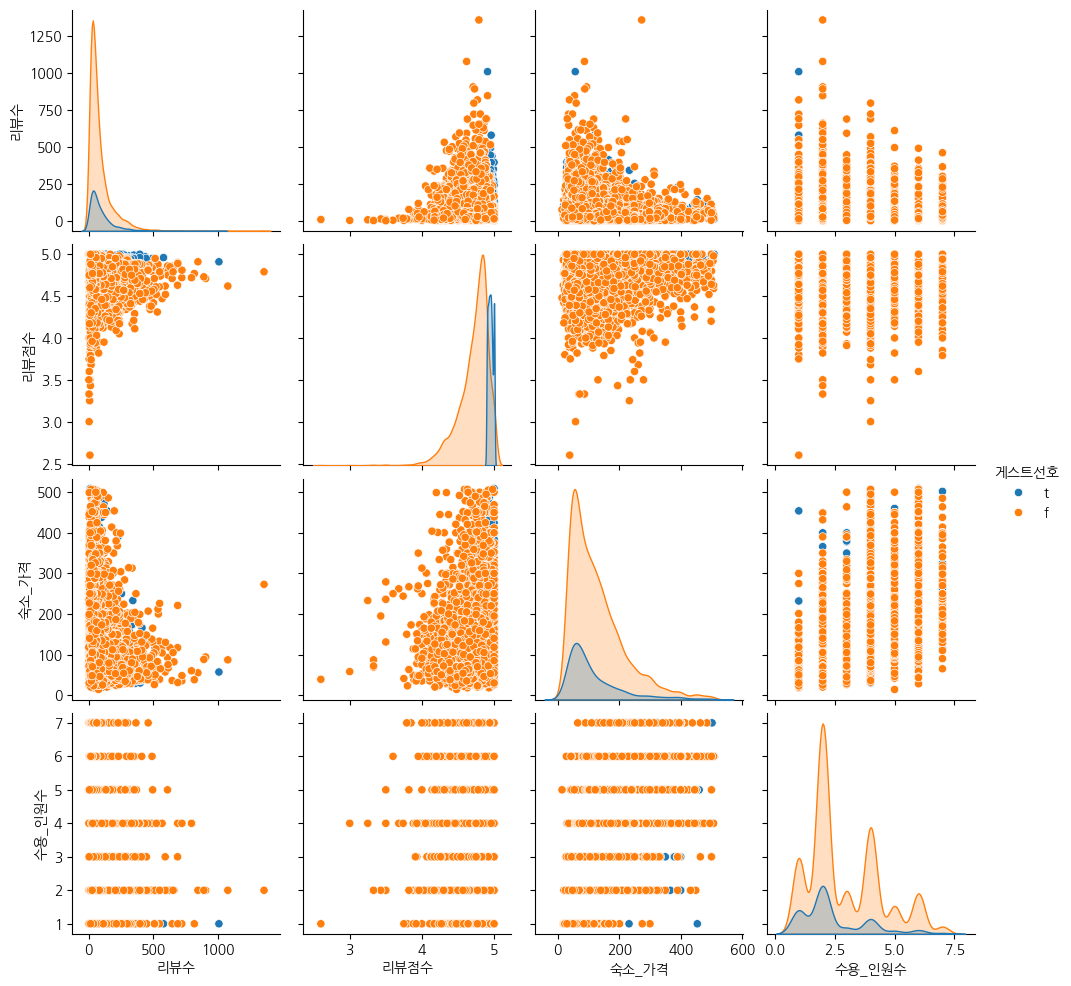

In [153]:
sns.pairplot(lists_50000, vars=['리뷰수', '리뷰점수', '숙소_가격', '수용_인원수'], height=2.5, hue='게스트선호')
plt.show()

In [24]:
import plotly.express as px
import pandas as pd


# # Define a function to format the mean value
# def format_mean(x):
#     return round(x, 2) if isinstance(x, float) else x

# 숙소_리뷰점수 컬럼의 평균값 계산 및 포맷
agg_results_t = lists_t_50000.groupby('숙소_지역')['숙소_id'].agg(['count']).reset_index()
agg_results_t.columns = ['Statistic', 'Value']
agg_results_t['Type'] = 'Guest T'

agg_results_f = lists_f_50000.groupby('숙소_지역')['숙소_id'].agg(['count']).reset_index()
agg_results_f.columns = ['Statistic',  'Value']
agg_results_f['Type'] = 'Guest F'

# 두개의 데이터 결합
agg_results = pd.concat([agg_results_t, agg_results_f])

# 오름차순으로 나타내기
agg_results = agg_results.sort_values(by='Value')

# Add dollar sign for display purposes
agg_results['Value_display'] = agg_results['Value'].astype(str) + "개"

# Plotting with Plotly
fig = px.bar(agg_results, x='Value', y='Statistic', color='Type', barmode='group',
             title='Summary Statistics of 숙소지역',
             labels={'Value': '값', 'Statistic': '통계'}, text='Value_display', orientation='h')

# 세로 크기 조정
fig.update_layout(height=800)
fig.show()



하위 지역은 런던중심에서 외곽 지역에 해당 (대부분 현지인 주거지역)
- Barking and Dagenham(바킹 앤드 다게넘): <span style="color:yellow">동쪽 외곽</span>에 위치 / <span style="color:yellow">공업 지대와 주거 지역이 혼재</span> 다문화 지역
- Havering(해버링): <span style="color:yellow">동쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역 느낌</span> 평온하고 넓은 녹지가 있다.
- Sutton(서턴): <span style="color:yellow">남쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역</span> (가족들이 살기 좋은 환경을 제공)
- City of London: <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">런던의 금융 중심지</span> (고층 건물과 역사적인 랜드마크가 혼재)
- Bromley(브롬리): <span style="color:yellow">남동쪽 외곽</span>에 위치 / <span style="color:yellow"> 큰 주거 지역</span> (녹지가 많고 가족들이 많이 거주)
- Hillingdon(힐링던): <span style="color:yellow">서쪽 외곽</span>에 위치 / <span style="color:yellow">히드로 공항이 있다.</span>
- Redbridge(레드브리지): <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (다양한 커뮤니티와 녹지가 있다)
- Harrow(해로): <span style="color:yellow">북서쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (좋은 교육 시설이 많음)
-

In [25]:
import plotly.express as px
import pandas as pd


# # Define a function to format the mean value
# def format_mean(x):
#     return round(x, 2) if isinstance(x, float) else x

# 숙소_리뷰점수 컬럼의 평균값 계산 및 포맷
agg_results_t = lists_t_50000.groupby('숙소_유형')['숙소_id'].agg(['count']).reset_index()
agg_results_t.columns = ['Statistic', 'Value']
agg_results_t['Type'] = 'Guest T'

agg_results_f = lists_f_50000.groupby('숙소_유형')['숙소_id'].agg(['count']).reset_index()
agg_results_f.columns = ['Statistic',  'Value']
agg_results_f['Type'] = 'Guest F'

# 두개의 데이터 결합
agg_results = pd.concat([agg_results_t, agg_results_f])

# 오름차순으로 나타내기
agg_results = agg_results.sort_values(by='Value')

# Add dollar sign for display purposes
agg_results['Value_display'] = agg_results['Value'].astype(str) + "개"

# Plotting with Plotly
fig = px.bar(agg_results, x='Value', y='Statistic', color='Type', barmode='group',
             title='Summary Statistics of 숙소유형',
             labels={'Value': '값', 'Statistic': '통계'}, text='Value_display', orientation='h')


fig.show()

In [26]:
lists_50000_corr_t = lists_50000[lists_50000['게스트선호'] == 't'][['리뷰점수','리뷰수','숙소_가격','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수','수용_인원수']]

lists_50000_corr_f = lists_50000[lists_50000['게스트선호'] == 'f'][['리뷰점수','리뷰수','숙소_가격','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
'숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수','수용_인원수']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



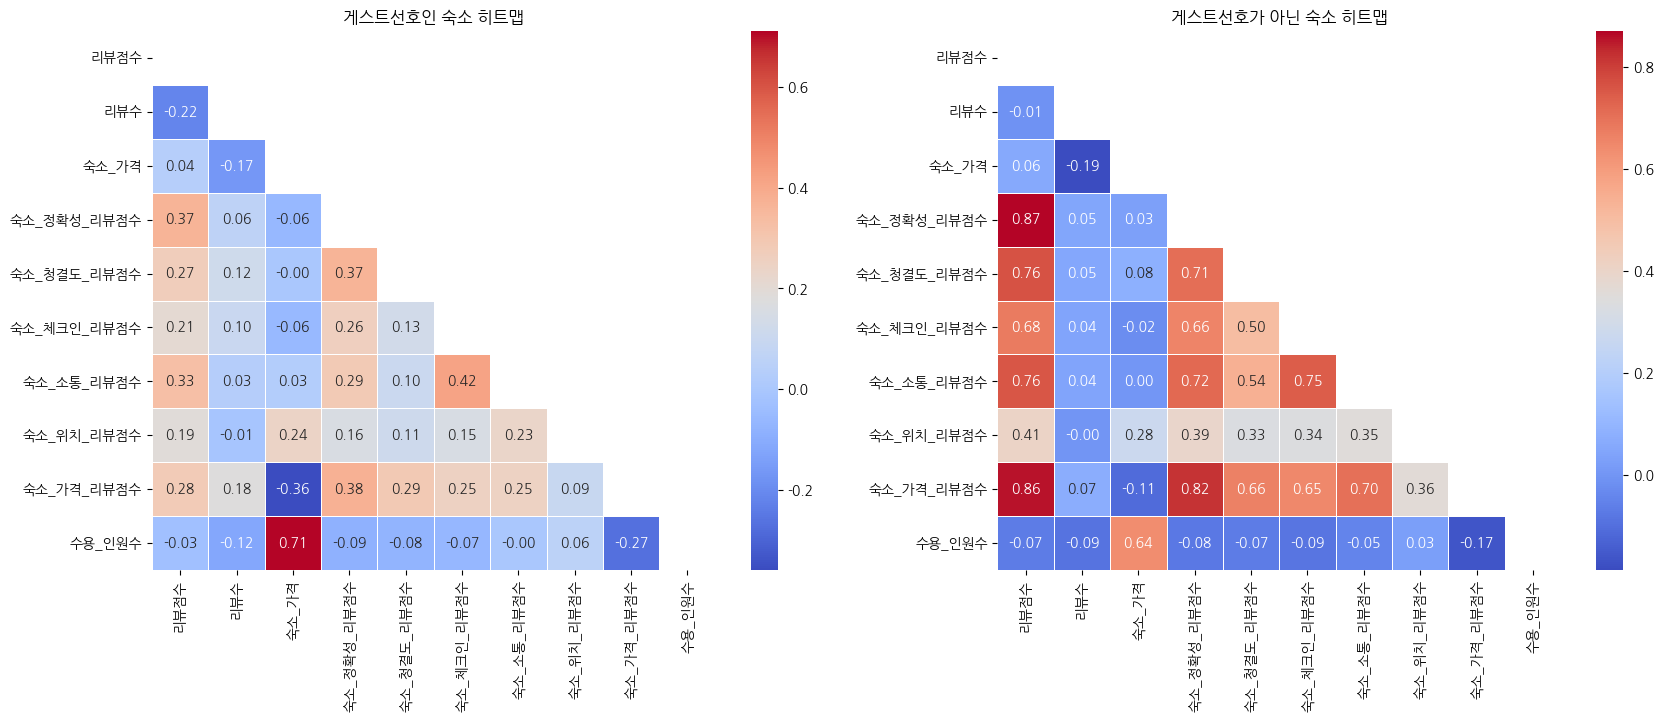

In [154]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr_t = lists_50000_corr_t.corr()
corr_f = lists_50000_corr_f.corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))


# 마스크 생성 (상단 삼각형)
mask_t = np.triu(np.ones_like(corr_t, dtype=bool))
mask_f = np.triu(np.ones_like(corr_f, dtype=bool))


# 히트맵 그리기
sns.heatmap(corr_t, mask=mask_t, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
axes[0].set_title('게스트선호인 숙소 히트맵')

sns.heatmap(corr_f, mask=mask_f, ax=axes[1],annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
axes[1].set_title('게스트선호가 아닌 숙소 히트맵')


plt.show()

게스트 선호 별 리뷰데이터 EDA분석

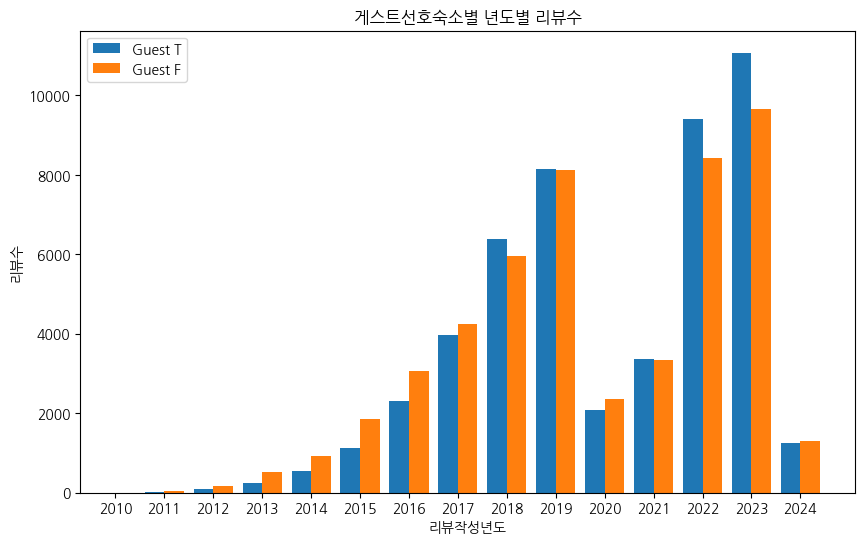

In [29]:
#게스트선호 날짜별 리뷰 수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reviews_per_year_t = random_guest_t['리뷰날짜'].dt.year.value_counts()
reviews_per_year_f = random_guest_f['리뷰날짜'].dt.year.value_counts()

# Adding missing years for a complete range
all_years = pd.Series(range(min(reviews_per_year_t.index.min(), reviews_per_year_f.index.min()),
                            max(reviews_per_year_t.index.max(), reviews_per_year_f.index.max()) + 1))



# Plotting
plt.figure(figsize=(10, 6))
plt.bar(reviews_per_year_t.index - 0.2, reviews_per_year_t.values, width=0.4, label='Guest T')
plt.bar(reviews_per_year_f.index + 0.2, reviews_per_year_f.values, width=0.4, label='Guest F')

plt.xlabel('리뷰작성년도')
plt.ylabel('리뷰수')
plt.title('게스트선호숙소별 년도별 리뷰수')
plt.legend()
plt.xticks(all_years)
plt.show()

In [30]:
comment_by_id_t = random_guest_t.groupby(random_guest_t['숙소_id'])['리뷰'].count().sort_values(ascending=False)
comment_by_id_f = random_guest_f.groupby(random_guest_f['숙소_id'])['리뷰'].count().sort_values(ascending=False)

In [31]:
comment_by_id_t[:10]

숙소_id
2126708     406
3602711     216
20704116    195
15555380    195
12198477    187
3860604     180
21108020    170
3570578     164
8144640     163
7642556     162
Name: 리뷰, dtype: int64

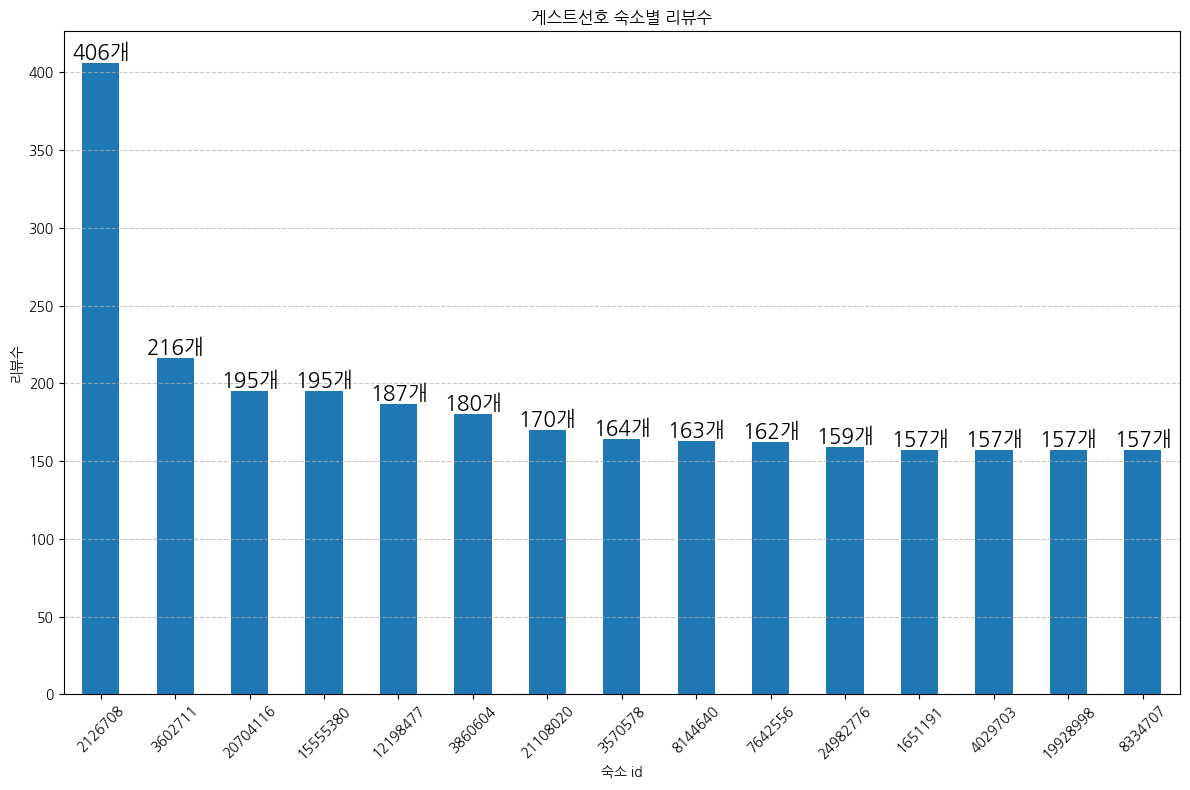

In [32]:
# 막대 그래프 (Bar Plot)
comment_by_id_t[:15].plot(kind='bar', figsize=(12, 8))

for i, v in enumerate(comment_by_id_t[:15]):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

plt.title('게스트선호 숙소별 리뷰수')
plt.xlabel('숙소 id')
plt.ylabel('리뷰수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

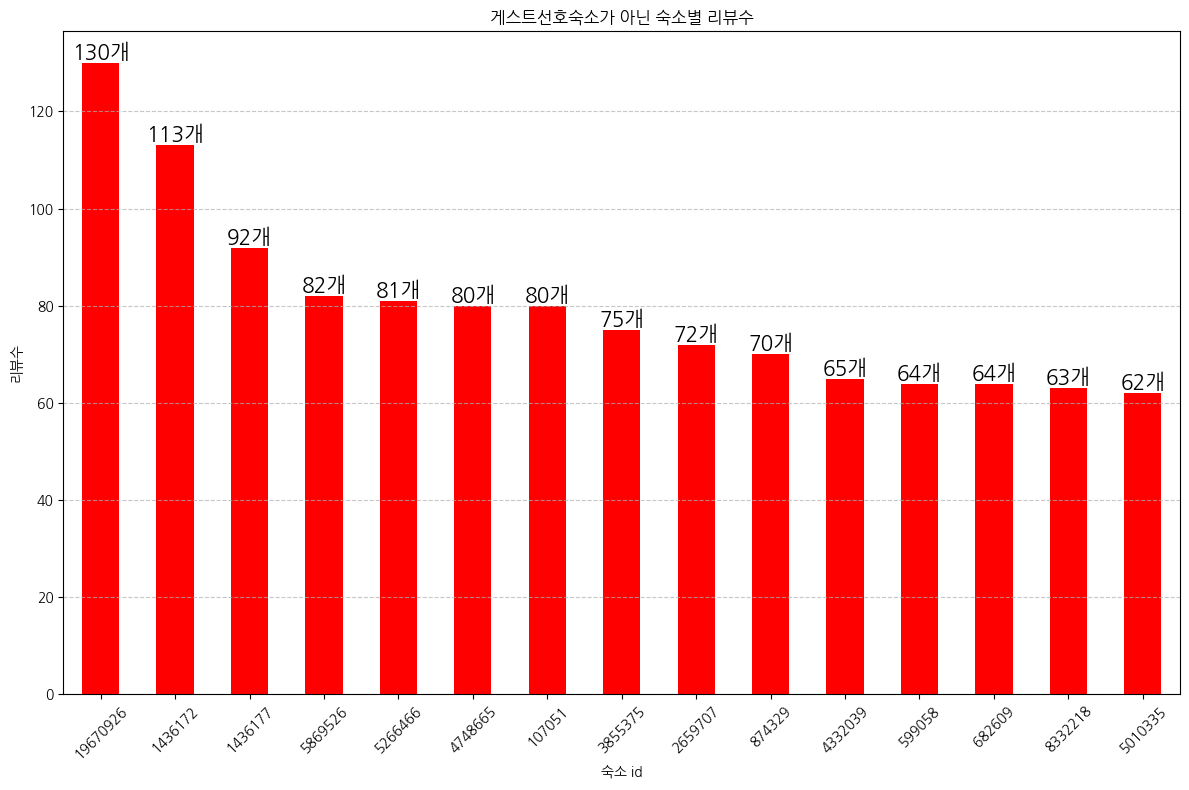

In [33]:
# 막대 그래프 (Bar Plot)
comment_by_id_f[:15].plot(kind='bar', figsize=(12, 8), color='red')

for i, v in enumerate(comment_by_id_f[:15]):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

plt.title('게스트선호숙소가 아닌 숙소별 리뷰수')
plt.xlabel('숙소 id')
plt.ylabel('리뷰수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

게스트 선호숙소인 숙소가 리뷰수가 더 많다

In [34]:
!pip install nltk
!pip install wordcloud

In [35]:
# !pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

텍스트 전처리


- 소문자로 변경
- 토큰화
- 불용어 제거
- 어간 추출


게스트 선호인 숙소 텍스트 분석

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  # 정규표현식

from functools import reduce  # 2차원 >> 1차원

from nltk.tokenize import word_tokenize  # word >> token
from nltk.corpus import stopwords  # stopwords >> 불용어
from nltk.stem import WordNetLemmatizer  # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

guest_t_words = []
guest_f_words = []

def Pretreatment(data, words_list):
    for title in data['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+", " ", str(title))  # 정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
        en_words_token = word_tokenize(en_words.lower())  # 변환된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in stopWords]  # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  # 어간 추출
        words_list.extend(en_words_lemma)  # words 리스트에 단어 추가

# 진행사항 표시
tqdm.pandas()

# Pretreatment 함수 호출
Pretreatment(random_guest_t, guest_t_words)
Pretreatment(random_guest_f, guest_f_words)

# 결과 출력 (샘플 10개 출력)
print(guest_t_words[:10])
print(guest_f_words[:10])

['zaklina', 'charming', 'landlady', 'nice', 'warm', 'grateful', 'help', 'room', 'neat', 'clean']
['carl', 'friendly', 'accommodation', 'nicer', 'expected', 'spotlessly', 'clean', 'connection', 'center', 'easy']


불용어 추가 제거

In [37]:
# 기본 NLTK 불용어
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  # 정규표현식

from functools import reduce  # 2차원 >> 1차원

from nltk.tokenize import word_tokenize  # word >> token
from nltk.corpus import stopwords  # stopwords >> 불용어
from nltk.stem import WordNetLemmatizer  # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay','apartment','house','room','host','comfortable',
             'amazing','perfect','wonderful','excellent','lovely','highly','recommend','definitely', 'really',
             'london','u', 'everything', 'well', 'home','helpful','also','like','location','staying','could','need',
             'airbnb', 'london', 'host','everything','room']

# 전체 불용어 집합
custom_stopwords = stopwords.union(add_stopwords)

def remove_stopwords(tokenized_words, stopwords):

    filtered_words = [word for word in tokenized_words if word.lower() not in stopwords]
    return filtered_words



# 불용어 제거
filtered_words_t = remove_stopwords(guest_t_words, custom_stopwords)
filtered_words_f = remove_stopwords(guest_f_words, custom_stopwords)



In [38]:
find = 'airbnb'
if find in filtered_words_t:
    print('True')
else:
    print('False')

False


In [39]:
import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

토큰화한 단어들 중 명사만 추출

- NN : 단수형, 셀수 없는 명사 (dog, information)
- NNS : 복수형 명사 (dogs, cars)
- NNP : 고유 명사 단수, (사람이름, 나라이름)
- NNPS : 고유명사 복수

In [40]:
def extract_nouns(filtered_word_list):
    tagged_words = pos_tag(filtered_word_list)
    nouns = [word for word, pos in tagged_words if pos.startswith(('NN', 'NNS'))]
    return nouns

word_list_nouns_t = extract_nouns(filtered_words_t)
word_list_nouns_f = extract_nouns(filtered_words_f)



In [41]:
word_list_nouns_t

['zaklina',
 'grateful',
 'help',
 'supermarket',
 'park',
 'experience',
 'area',
 'metro',
 'center',
 'shop',
 'belinda',
 'area',
 'belinda',
 'question',
 'information',
 'sofa',
 'furniture',
 'crisp',
 'linen',
 'towel',
 'kitchen',
 'area',
 'lot',
 'communication',
 'thank',
 'cozy',
 'street',
 'transportation',
 'attraction',
 'tube',
 'station',
 'bus',
 'supermarket',
 'look',
 'photo',
 'part',
 'balcony',
 'jodie',
 'information',
 'sure',
 'question',
 'air',
 'mattress',
 'look',
 'time',
 'event',
 'imagine',
 'night',
 'convenient',
 'day',
 'staircase',
 'lot',
 'privacy',
 'andrew',
 'care',
 'anybody',
 'transportation',
 'area',
 'service',
 'design',
 'view',
 'garden',
 'owner',
 'kind',
 'choice',
 'cute',
 'gabriel',
 'communication',
 'convenient',
 'station',
 'communication',
 'arrival',
 'book',
 'area',
 'philippa',
 'husband',
 'chatting',
 'character',
 'bathroom',
 'door',
 'base',
 'anyone',
 'putney',
 'plenty',
 'access',
 'town',
 'communicator',


빈도수를 보자

In [42]:
import nltk
from nltk import pos_tag
from collections import Counter

freq_nouns_t = Counter(word_list_nouns_t)
freq_nouns_f = Counter(word_list_nouns_f)

# 결과 출력
print("Guest T 명사 빈도수:")
print(freq_nouns_t)
print("\nGuest F 명사 빈도수:")
print(freq_nouns_f)

Guest T 명사 빈도수:
Counter({'time': 7179, 'station': 7074, 'area': 6003, 'bathroom': 4428, 'day': 4195, 'kind': 4043, 'minute': 4032, 'bus': 3976, 'tube': 3862, 'breakfast': 3825, 'walk': 3671, 'space': 3552, 'restaurant': 3328, 'lot': 3302, 'thanks': 3167, 'night': 3139, 'family': 3106, 'city': 3044, 'experience': 2951, 'thank': 2935, 'accommodation': 2875, 'feel': 2805, 'communication': 2563, 'shop': 2372, 'garden': 2288, 'visit': 2263, 'bed': 2248, 'street': 2226, 'check': 2214, 'transport': 2186, 'kitchen': 2159, 'park': 2148, 'access': 2110, 'train': 1983, 'neighborhood': 1967, 'coffee': 1967, 'trip': 1959, 'distance': 1931, 'convenient': 1867, 'bedroom': 1790, 'thing': 1740, 'morning': 1737, 'clean': 1727, 'min': 1717, 'people': 1655, 'amenity': 1574, 'way': 1548, 'cozy': 1546, 'book': 1520, 'help': 1513, 'anyone': 1494, 'question': 1472, 'person': 1413, 'hospitality': 1370, 'view': 1362, 'comfy': 1340, 'week': 1316, 'tea': 1300, 'get': 1289, 'line': 1267, 'tidy': 1253, 'food': 1199

게스트선호인숙소 리뷰 시각화

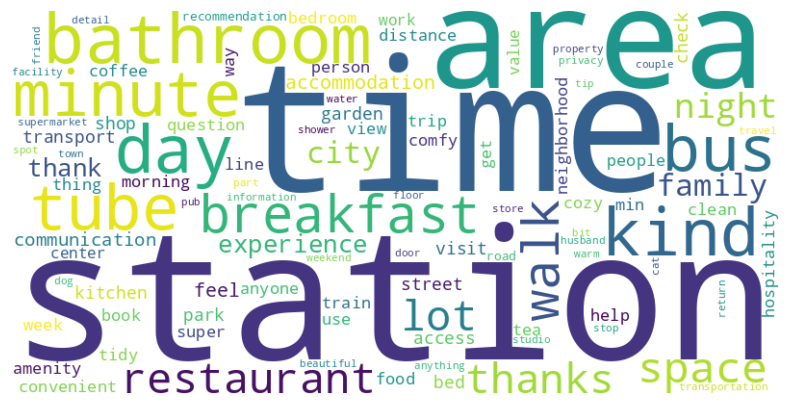

In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = pd.Series(word_list_nouns_t).value_counts().head(100)

# 워드클라우드를 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

게스트선호가 아닌 숙소 리뷰 시각화

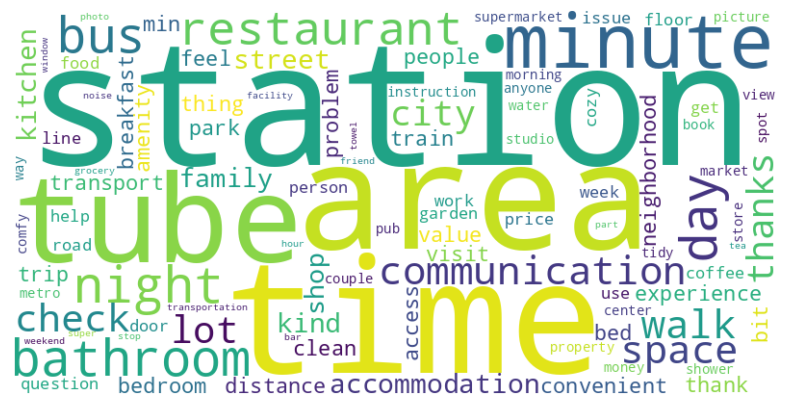

In [44]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = pd.Series(word_list_nouns_f).value_counts().head(100)

# 워드클라우드를 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



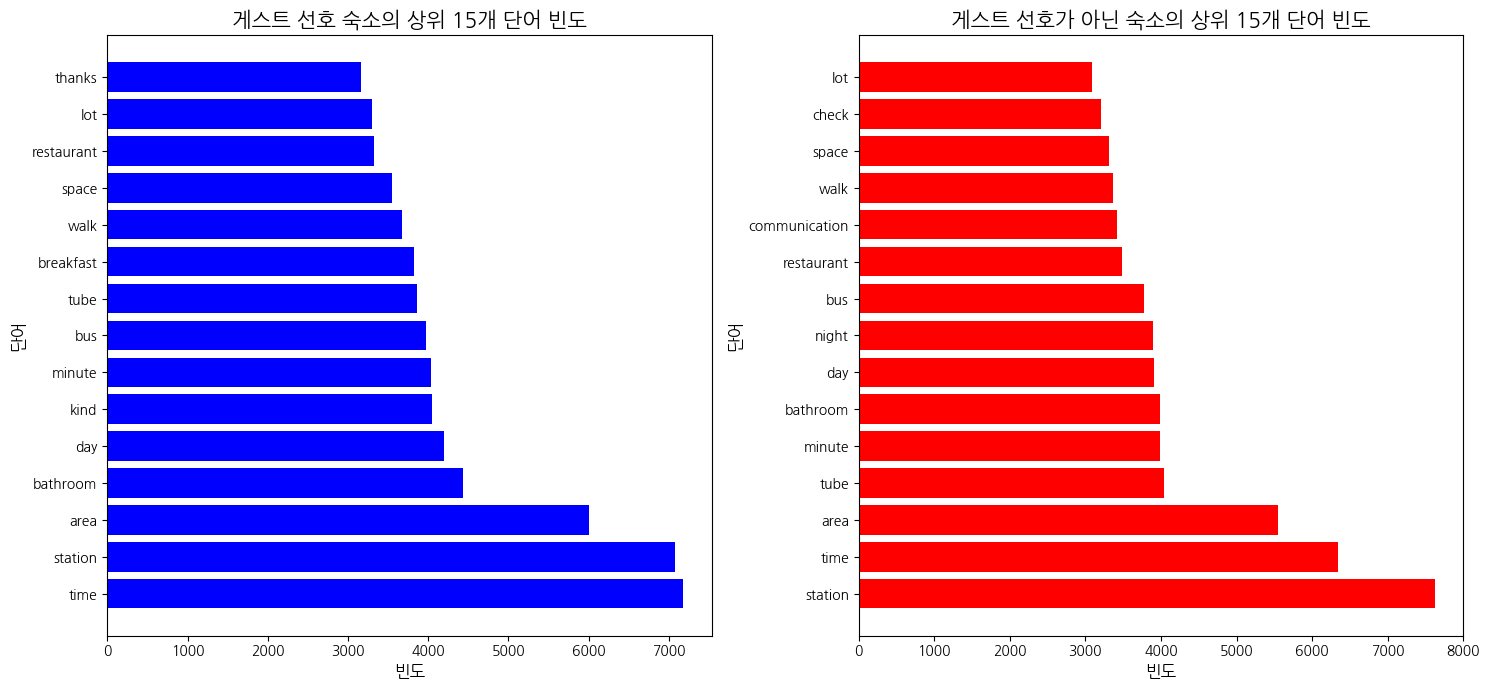

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# 단어 빈도 계산
word_counts_t = freq_nouns_t
word_counts_f = freq_nouns_f

# 상위 15개 단어 추출
top_word_counts_t = pd.Series(word_counts_t).sort_values(ascending=False).head(15)
top_word_counts_f = pd.Series(word_counts_f).sort_values(ascending=False).head(15)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# 긍정 리뷰 단어 빈도 가로 막대 그래프
axes[0].barh(top_word_counts_t.index, top_word_counts_t.values, color='blue')
axes[0].set_title('게스트 선호 숙소의 상위 15개 단어 빈도', fontsize=15)
axes[0].set_xlabel('빈도', fontsize=12)
axes[0].set_ylabel('단어', fontsize=12)

# 부정 리뷰 단어 빈도 가로 막대 그래프
axes[1].barh(top_word_counts_f.index, top_word_counts_f.values, color='red')
axes[1].set_title('게스트 선호가 아닌 숙소의 상위 15개 단어 빈도', fontsize=15)
axes[1].set_xlabel('빈도', fontsize=12)
axes[1].set_ylabel('단어', fontsize=12)

# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


단어들은 비슷하지만 게스트 선호 숙소의 빈도수가 더 높다

In [45]:
!pip install gensim
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.6 MB/s eta 0:00:00


In [46]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

전처리

In [47]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models


# 불용어 설정
stop_words = set(stopwords.words('english'))

# 추가 불용어 목록
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u']

# 전체 불용어 집합
custom_stopwords = stop_words.union(set(add_stopwords))

# 어간 추출기 설정
lemma = WordNetLemmatizer()

# 전처리 함수
def preprocess(data):
    processed_words = []
    for title in data['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+", " ", str(title))  # 정규표현식 사용, 영문 대소문자 제외한 문자를 공백으로 변경
        en_words_token = word_tokenize(en_words.lower())  # 변환된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in custom_stopwords]  # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  # 어간 추출

        processed_words.append(en_words_lemma)
    return processed_words

# 전처리
processed_reviews_t = preprocess(random_guest_t)
processed_reviews_f = preprocess(random_guest_f)



명사추출

In [48]:
import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

def extract_nouns(reviews):
    all_nouns = []
    for review in reviews:
        tagged_words = pos_tag(review)
        nouns = [word for word, pos in tagged_words if pos.startswith(('NN','NNS'))]
        all_nouns.append(nouns)
    return all_nouns

# 전처리된 리뷰에서 명사 추출
word_list_nouns_t = extract_nouns(processed_reviews_t)
word_list_nouns_f = extract_nouns(processed_reviews_f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


게스트선호인 숙소 리뷰의 토픽 모델링 시각화

In [49]:
# 단어 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(word_list_nouns_t)
corpus = [dictionary.doc2bow(text) for text in word_list_nouns_t]

# LDA 모델 학습
num_topics = 5  # 토픽 수 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 각 토픽 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

# PyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
Words: 0.028*"check" + 0.022*"night" + 0.022*"area" + 0.018*"time" + 0.018*"communication" + 0.015*"bathroom" + 0.015*"space" + 0.013*"question" + 0.012*"bed" + 0.011*"bedroom"
Topic: 1 
Words: 0.053*"station" + 0.031*"bus" + 0.030*"minute" + 0.029*"tube" + 0.028*"walk" + 0.025*"restaurant" + 0.019*"area" + 0.018*"shop" + 0.017*"city" + 0.015*"train"
Topic: 2 
Words: 0.037*"garden" + 0.028*"space" + 0.020*"studio" + 0.019*"view" + 0.018*"clean" + 0.016*"transport" + 0.014*"area" + 0.012*"thank" + 0.010*"richmond" + 0.009*"david"
Topic: 3 
Words: 0.038*"breakfast" + 0.022*"day" + 0.022*"family" + 0.021*"time" + 0.017*"bathroom" + 0.016*"morning" + 0.015*"host" + 0.015*"coffee" + 0.014*"kind" + 0.013*"tea"
Topic: 4 
Words: 0.048*"host" + 0.043*"accommodation" + 0.035*"time" + 0.032*"kind" + 0.030*"thank" + 0.025*"thanks" + 0.022*"feel" + 0.019*"experience" + 0.017*"value" + 0.016*"hospitality"


토픽 1 - station (역), bus (버스), minute (분), tube (지하철), walk (도보), restaurant (레스토랑), area (지역), shop (상점), city (도시), train (기차), distance (거리), park (공원), street (거리), access (접근성), neighborhood (이웃), convenient (편리한), center (중심), time (시간), bathroom (화장실), pub (펍)

토픽 2 - breakfast (아침 식사), day (날), family (가족), time (시간), bathroom (화장실), morning (아침), coffee (커피), kind (친절한), tea (차), experience (경험), people (사람들), feel (느낌), kitchen (부엌), thank (감사), night (밤), lot (많은), thanks (감사합니다), bed (침대), trip (여행), thing (것), dog (개), water (물), towel (수건), friend (친구), bedroom (침실), milk (우유), way (길), use (사용), space (공간)

토픽 3 - check (체크인), night (밤), area (지역), time (시간), communication (소통), bathroom (화장실), space (공간), question (질문), bed (침대), bedroom (침실), super (최고의), floor (층), thanks (감사), thing (것), day (날), instruction (지시), lot (많은), property (재산), comfy (편안한), issue (문제), street (거리), window (창문), problem (문제), spot (장소), amenity (편의시설), price (가격), work (작업), flight (비행), bit (조금), weekend (주말)

토픽 4 - host (호스트), accommodation (숙소), time (시간), kind (친절한), thank (감사), thanks (감사합니다), feel (느낌), experience (경험), value (가치), hospitality (환대), tidy (깔끔한), visit (방문), communication (소통), area (지역), person (사람), clean (깨끗한), claire (클레어), anyone (누구든지), money (돈), nothing (아무것도), warm (따뜻한), cozy (아늑한), pleasure (기쁨), beautiful (아름다운), transport (교통), help (도움), welcoming (환영), convenient (편리한), paul (폴), welcome (환영합니다)

토픽 5 - garden (정원), space (공간), studio (스튜디오), view (전망), clean (깨끗한), transport (교통), area (지역), thank (감사), richmond (리치몬드), david (데이비드), gem (보석), amenity (편의시설), link (링크), touch (접촉), access (접근성), facility (시설), communication (소통), park (공원), spotless (티끌 없는), return (돌아오다), kew (큐), visit (방문), property (재산), palace (궁전), karen (카렌), clare (클레어), guy (남자), wine (와인), future (미래), river (강)




예상 주제

- 토픽 1 - 숙소의 위치와 접근성
- 토픽 2 - 가족 여행과 숙박 경험
- 토픽 3 - 숙소의 체크인 과정 및 편의시설
- 토픽 4 - 호스트의 친절함과 환대
- 토픽 5 - 숙소의 시설과 주변 환경

html로 저장 해놈

In [140]:
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel

def preprocess_review(text_nouns, output_html):
    # 단어 사전 및 코퍼스 생성
    dictionary = corpora.Dictionary(text_nouns)
    corpus = [dictionary.doc2bow(text) for text in text_nouns]

    # LDA 모델 학습
    num_topics = 5  # 토픽 수 설정
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # PyLDAvis 시각화
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

    # HTML 파일로 저장
    pyLDAvis.save_html(vis, output_html)
    print(f"LDA visualization saved to {output_html}")

# HTML 파일로 저장
preprocess_review(word_list_nouns_f, '게스트선호가 아닌 숙소의 전체 토픽.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LDA visualization saved to 게스트선호가 아닌 숙소의 전체 토픽.html


게스트선호가 아닌 숙소의 토픽 모델링 시각화

In [50]:
# 단어 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(word_list_nouns_f)
corpus = [dictionary.doc2bow(text) for text in word_list_nouns_f]

# LDA 모델 학습
num_topics = 5  # 토픽 수 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 각 토픽 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \n Words: {topic}")

# PyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
 Words: 0.040*"bathroom" + 0.029*"kitchen" + 0.025*"night" + 0.020*"bed" + 0.019*"bedroom" + 0.017*"value" + 0.016*"day" + 0.016*"bit" + 0.015*"people" + 0.014*"problem"
Topic: 1 
 Words: 0.041*"time" + 0.036*"kind" + 0.033*"experience" + 0.026*"thank" + 0.024*"clean" + 0.024*"thanks" + 0.019*"feel" + 0.017*"breakfast" + 0.013*"super" + 0.011*"host"
Topic: 2 
 Words: 0.021*"price" + 0.019*"property" + 0.018*"work" + 0.016*"communication" + 0.015*"picture" + 0.015*"space" + 0.014*"facility" + 0.012*"amenity" + 0.011*"tv" + 0.010*"service"
Topic: 3 
 Words: 0.040*"accommodation" + 0.039*"communication" + 0.029*"transport" + 0.028*"check" + 0.027*"area" + 0.026*"city" + 0.023*"host" + 0.022*"time" + 0.020*"family" + 0.018*"access"
Topic: 4 
 Words: 0.065*"station" + 0.035*"tube" + 0.034*"minute" + 0.031*"bus" + 0.030*"walk" + 0.030*"restaurant" + 0.020*"shop" + 0.018*"area" + 0.017*"street" + 0.016*"park"


- 토픽 1 - station (역), tube (지하철), minute (분), bus (버스), walk (도보), restaurant (레스토랑), shop (상점), area (지역), street (거리), park (공원)

- 토픽 2 - bathroom (화장실), kitchen (부엌), night (밤), bed (침대), bedroom (침실), value (가치), day (날), bit (조금), people (사람들), problem (문제)

- 토픽 3 - time (시간), kind (친절한), experience (경험), thank (감사), clean (깨끗한), thanks (감사합니다), feel (느낌), breakfast (아침 식사), super (최고의), host (호스트)

- 토픽 4 - accommodation (숙소), communication (소통), transport (교통), check (체크인), area (지역), city (도시), host (호스트), time (시간), family (가족), access (접근성)

- 토픽 5 - price (가격), property (재산), work (작업), communication (소통), picture (사진), space (공간), facility (시설), amenity (편의시설), tv (TV), service (서비스)


예상 주제

- 토픽 1 : 교통 및 편의시설 접근성
- 토픽 2 : 숙소 시설과 가치
- 토픽 3 : 호스트의 친절과 숙박 경험
- 토픽 4 : 교통 접근성과 소통
- 토픽 5 : 숙소의 가격과 편의시설

감성 분석 - 단일문자열로 실행하면 안됨(빈도수에 씀) append 사용

- expend는 한 리스트안에 모든 단어를 넣는 의미 ex) ['apple,'banana','orange',...]
- append는 한 리스트에 각 리뷰의 단어를 뽑아 리스트로 담아서 넣는 의미 ex) [['apple','banna'],['orange']]

- 다시 전처리 후 토픽모델링 실행함

In [51]:
!pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
from textblob import TextBlob
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


# 불용어 설정
stop_words = set(stopwords.words('english'))

# 추가 불용어 목록
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u']

# 전체 불용어 집합
custom_stopwords = stop_words.union(set(add_stopwords))


# 전처리 함수
def preprocess(data):
    positive_words = Counter()
    negative_words = Counter()

    for i, text in enumerate(data):
        text = text.lower() #소문자로 변경
        text = re.sub(r"[^a-zA-Z]+", " ",text)  # 정규표현식 사용, 영문 대소문자 제외한 문자를 공백으로 변경
        words = [word for word in text.split() if not word in custom_stopwords]  # 불용어 제거

        # 품사 태그
        tagged_words = pos_tag(words)
        nouns = [word for word, pos in tagged_words if pos in ('NN', 'NNS')]  # 명사 추출

        for word in nouns:
            word_blob = TextBlob(word)
            if word_blob.sentiment.polarity > 0:
                positive_words[word] += 1
            elif word_blob.sentiment.polarity < 0:
                negative_words[word] += 1

    return positive_words, negative_words

# 긍정 및 부정 단어 빈도수 추출
positive_words_t, negative_words_t = preprocess(random_guest_t['리뷰'])
positive_words_f, negative_words_f = preprocess(random_guest_f['리뷰'])

# 결과 출력
print("긍정 단어 빈도수 (Positive reviews):", positive_words_t)
print("부정 단어 빈도수 (Positive reviews):", negative_words_t)
print("긍정 단어 빈도수 (Negative reviews):", positive_words_f)
print("부정 단어 빈도수 (Negative reviews):", negative_words_f)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


긍정 단어 빈도수 (Positive reviews): Counter({'kind': 10154, 'thanks': 8305, 'clean': 4793, 'tidy': 2994, 'super': 2890, 'beautiful': 2187, 'warm': 2156, 'welcome': 1863, 'love': 1648, 'pleasant': 1420, 'cute': 1240, 'ideal': 1094, 'enjoy': 984, 'superb': 936, 'light': 897, 'fun': 822, 'calm': 595, 'offers': 588, 'secure': 544, 'right': 503, 'brilliant': 499, 'peaceful': 437, 'sure': 416, 'sweet': 400, 'cool': 381, 'absolute': 335, 'bright': 326, 'top': 299, 'stylish': 269, 'joy': 258, 'glad': 248, 'worth': 246, 'quick': 244, 'easy': 235, 'thoughtful': 224, 'accurate': 189, 'enjoyed': 189, 'wow': 179, 'attentive': 174, 'awesome': 172, 'action': 145, 'wise': 139, 'charming': 138, 'fine': 133, 'delightful': 132, 'seamless': 127, 'warmly': 126, 'sound': 125, 'magnificent': 124, 'fast': 121, 'smooth': 119, 'smile': 111, 'vibrant': 109, 'pretty': 105, 'fantastic': 96, 'haha': 95, 'okay': 88, 'modern': 88, 'ok': 84, 'fit': 75, 'respectful': 74, 'straightforward': 70, 'adult': 70, 'flawless': 69, 's

게스트선호숙소의 긍정 / 부정 시각화

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



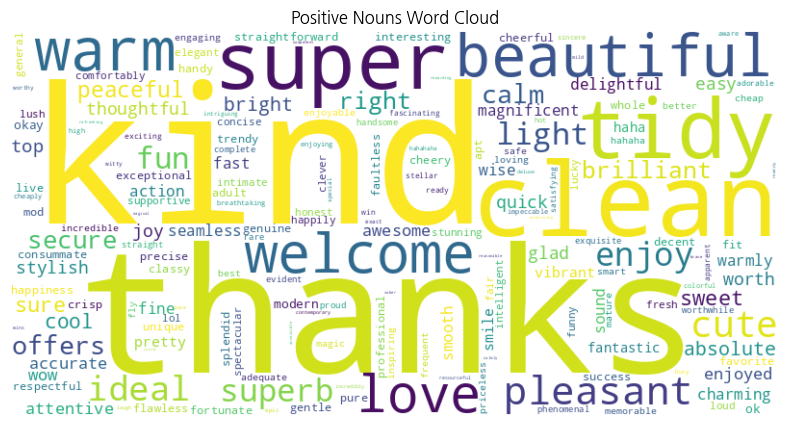

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 명사 워드클라우드 생성 및 시각화
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words_t)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Nouns Word Cloud')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



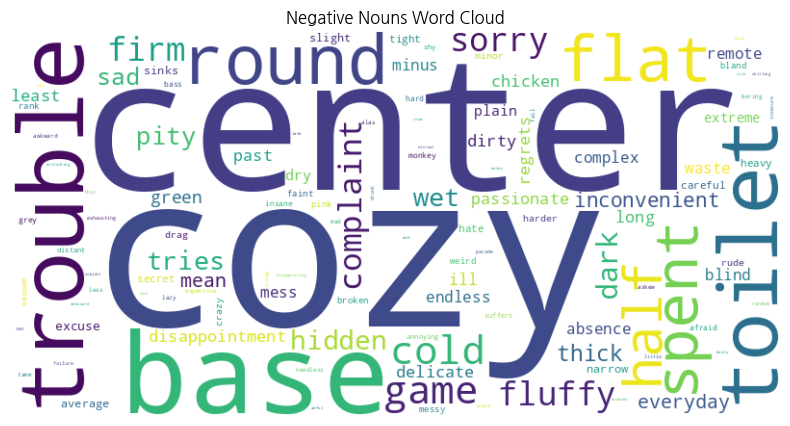

In [54]:
# 부정 명사 워드클라우드 생성 및 시각화
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words_t)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Nouns Word Cloud')
plt.show()

게스트선호 숙소가 아닌 숙소 긍정/부정 시각화

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



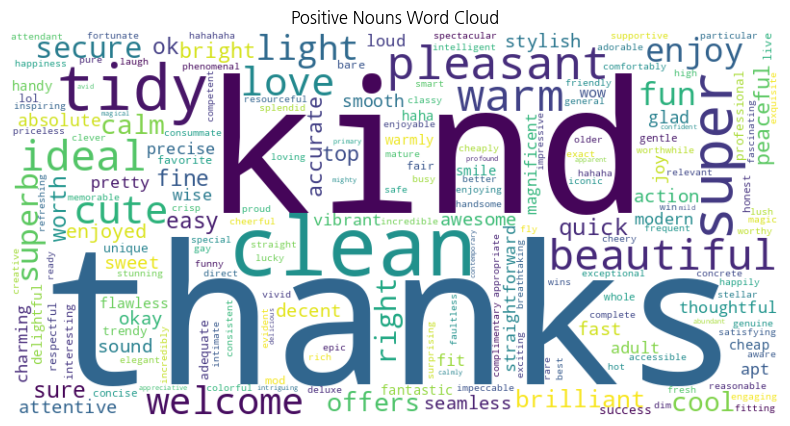

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 명사 워드클라우드 생성 및 시각화
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words_f)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Nouns Word Cloud')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



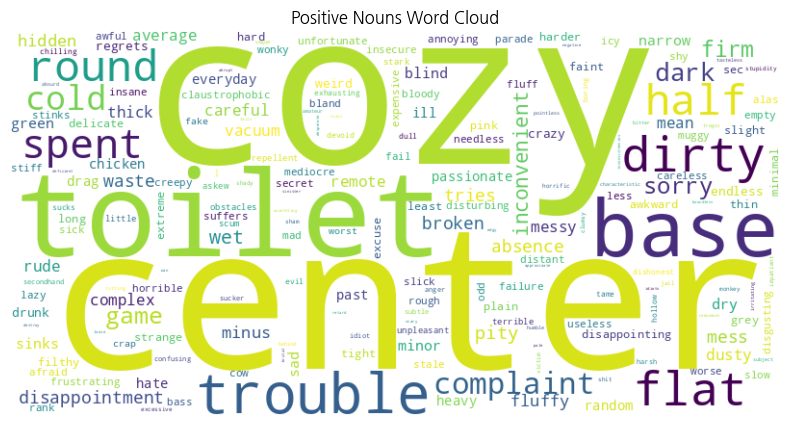

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 명사 워드클라우드 생성 및 시각화
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words_f)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Nouns Word Cloud')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



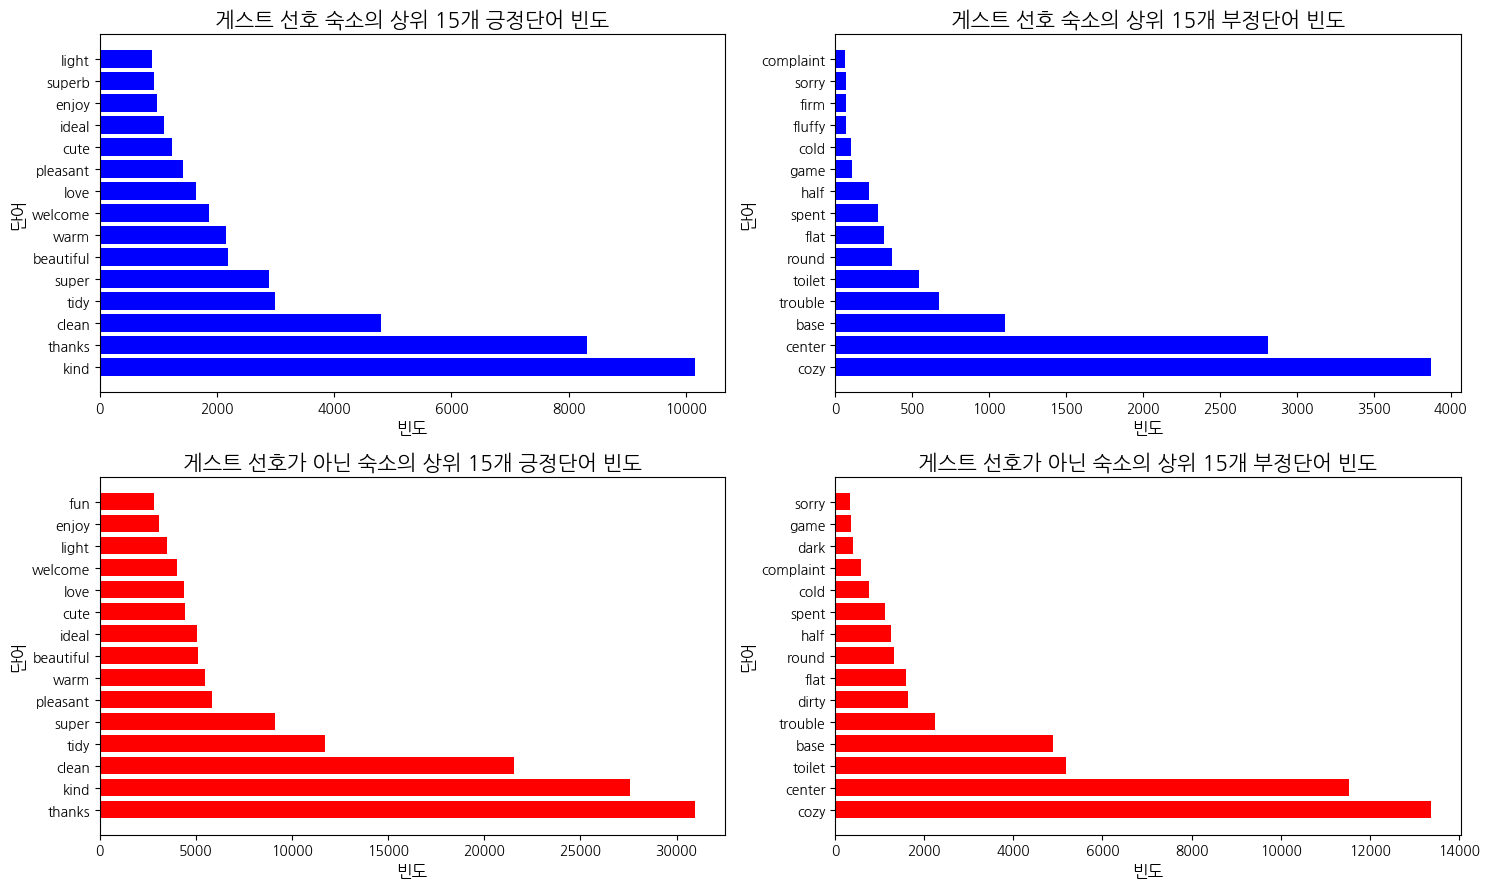

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# 단어 빈도 계산
word_counts_pos_t = Counter(positive_words_t)
word_counts_neg_t = Counter(negative_words_t)
word_counts_pos_f = Counter(positive_words_f)
word_counts_neg_f = Counter(negative_words_f)


# 상위 15개 단어 추출
top_word_counts_pos_t = pd.Series(word_counts_pos_t).sort_values(ascending=False).head(15)
top_word_counts_neg_t = pd.Series(word_counts_neg_t).sort_values(ascending=False).head(15)
top_word_counts_pos_f = pd.Series(word_counts_pos_f).sort_values(ascending=False).head(15)
top_word_counts_neg_f = pd.Series(word_counts_neg_f).sort_values(ascending=False).head(15)


# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

# 게스트 선호 숙소의 긍정단어 빈도
axes[0,0].barh(top_word_counts_pos_t.index, top_word_counts_pos_t.values, color='blue')
axes[0,0].set_title('게스트 선호 숙소의 상위 15개 긍정단어 빈도', fontsize=15)
axes[0,0].set_xlabel('빈도', fontsize=12)
axes[0,0].set_ylabel('단어', fontsize=12,rotation=90)

# 게스트 선호 숙소의 부정단어 빈도
axes[0,1].barh(top_word_counts_neg_t.index, top_word_counts_neg_t.values, color='blue')
axes[0,1].set_title('게스트 선호 숙소의 상위 15개 부정단어 빈도', fontsize=15)
axes[0,1].set_xlabel('빈도', fontsize=12)
axes[0,1].set_ylabel('단어', fontsize=12,rotation=90)

# 게스트 선호가 아닌 숙소의 긍정단어 빈도
axes[1,0].barh(top_word_counts_pos_f.index, top_word_counts_pos_f.values, color='red')
axes[1,0].set_title('게스트 선호가 아닌 숙소의 상위 15개 긍정단어 빈도', fontsize=15)
axes[1,0].set_xlabel('빈도', fontsize=12)
axes[1,0].set_ylabel('단어', fontsize=12,rotation=90)

# # 게스트 선호가 아닌 숙소의 부정단어 빈도
axes[1,1].barh(top_word_counts_neg_f.index, top_word_counts_neg_f.values, color='red')
axes[1,1].set_title('게스트 선호가 아닌 숙소의 상위 15개 부정단어 빈도', fontsize=15)
axes[1,1].set_xlabel('빈도', fontsize=12)
axes[1,1].set_ylabel('단어', fontsize=12,rotation=90)

# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

TF-IDF를 이용한 감성분석과 토픽모델링

In [57]:
# !pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- 텍스트 전처리
- 소문자로 변경
- 불용어 제거

In [58]:
import re

def reviews_Pretreatment(texts):
    cleaned_texts = []
    for text in texts:
        cleaned_text = text.lower()  # 소문자로 변환
        cleaned_text = re.sub(r'[\r\n]', ' ', cleaned_text)  # \r과 \n을 공백으로 변환
        cleaned_text = re.sub(r'[^a-zA-Z\s]+', '', cleaned_text)  # 특수문자 제거
        cleaned_texts.append(cleaned_text)
    return cleaned_texts

# 텍스트 전처리 수행
cleaned_reviews_t = reviews_Pretreatment(random_guest_t['리뷰'])
cleaned_reviews_f = reviews_Pretreatment(random_guest_f['리뷰'])

random_guest_t.loc[:, '리뷰'] = cleaned_reviews_t
random_guest_f.loc[:, '리뷰'] = cleaned_reviews_f



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
random_guest_t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,숙소_id,리뷰날짜,리뷰
225518,11667286,2022-11-05,zaklina is a very charming landlady she is nic...
585049,1468034,2022-06-21,impeccable warm and frenchspeaking welcome fro...
187395,8415990,2019-12-22,i enjoyed staying at belindas the house was in...
447250,26119084,2019-06-19,really comfortable sofas beds and garden furni...
571971,38369720,2019-10-16,the best location home away from home everythi...
...,...,...,...
88319,2610211,2017-05-03,ive stayed at verity a number of times on a re...
516074,32722282,2021-09-28,miyoungs place is clean and cosy it is well lo...
454843,26686253,2021-05-02,a fantastic flat in a fantastic location this...
483667,29516799,2022-05-10,just like the previous reviews indicated the l...


분석 모델 구축

결과를 한눈에 볼수있게 게스트 선호인 숙소/ 게스트선호가 아닌 숙소 코드 번갈아 가면서 입력함

- T : 게스트선호 숙소
- F : 게스트선호 숙소가 아님





In [60]:
#T

import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_sentiment_label(review):
    # TextBlob을 사용하여 감성 분석 수행
    analysis = TextBlob(review)
    return 1 if analysis.sentiment.polarity > 0 else 0

# 감성 분석을 수행하고 레이블 추가
random_guest_t['감성분류'] = random_guest_t['리뷰'].apply(get_sentiment_label)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [61]:
#F
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_sentiment_label(review):
    # TextBlob을 사용하여 감성 분석 수행
    analysis = TextBlob(review)
    return 1 if analysis.sentiment.polarity > 0 else 0

# 감성 분석을 수행하고 레이블 추가
random_guest_f['감성분류'] = random_guest_f['리뷰'].apply(get_sentiment_label)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
#T
random_guest_t['감성분류'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



감성분류
1    49327
0      673
Name: count, dtype: int64

In [63]:
#F
random_guest_f['감성분류'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



감성분류
1    48445
0     1555
Name: count, dtype: int64

In [64]:
#T

# tf-idf 벡터화
tfidf_vectorizer_t = TfidfVectorizer()
tfidf_t = tfidf_vectorizer_t.fit_transform(random_guest_t['리뷰'])

# 데이터와 레이블을 train/test로 분리
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(tfidf_t, random_guest_t['감성분류'], test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [65]:
#F

# tf-idf 벡터화
tfidf_vectorizer_f = TfidfVectorizer()
tfidf_f = tfidf_vectorizer_f.fit_transform(random_guest_f['리뷰'])

# 데이터와 레이블을 train/test로 분리
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(tfidf_f, random_guest_f['감성분류'], test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
#T

from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 학습
lr_t = LogisticRegression(random_state=0)
lr_t.fit(X_train_t, y_train_t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LogisticRegression(random_state=0)

In [67]:
#F

from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 학습
lr_f = LogisticRegression(random_state=0)
lr_f.fit(X_train_f, y_train_f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LogisticRegression(random_state=0)

In [68]:
#T

# 모델 평가
score = lr_t.score(X_test_t, y_test_t)
print(f"모델 정확도 : {score}")

모델 정확도 : 0.9899


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
#T

# 모델 평가
score = lr_f.score(X_test_f, y_test_f)
print(f"모델 정확도 : {score}")

모델 정확도 : 0.9712


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:
#T

from sklearn.model_selection import GridSearchCV
#params : 하이퍼파라미터 그리드를 정의하는 딕셔너리
# 'C' (규제 파라미터) : 모델의 복잡도를 조절 / 낮은 c값 강한 규제를 의미/ 높은 c값은 약한 규제
params = {'C' : [1, 3, 3.5, 4, 4.5, 5]}
lr_grid_cv_t = GridSearchCV(lr_t, param_grid=params, cv = 3, scoring = 'accuracy', verbose = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
#F

from sklearn.model_selection import GridSearchCV
#params : 하이퍼파라미터 그리드를 정의하는 딕셔너리
# 'C' (규제 파라미터) : 모델의 복잡도를 조절 / 낮은 c값 강한 규제를 의미/ 높은 c값은 약한 규제
params = {'C' : [1, 3, 3.5, 4, 4.5, 5]}
lr_grid_cv_f = GridSearchCV(lr_f, param_grid=params, cv = 3, scoring = 'accuracy', verbose = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
#T

#감성 분류 모델 구축

lr_grid_cv_t.fit(tfidf_t, random_guest_t['감성분류'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [73]:
#F

#감성 분류 모델 구축

lr_grid_cv_f.fit(tfidf_f, random_guest_f['감성분류'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [75]:
#T

print(lr_grid_cv_t.best_params_,  round(lr_grid_cv_t.best_score_, 3)) #약한 규제

{'C': 5} 0.991


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [74]:
#F

print(lr_grid_cv_f.best_params_,  round(lr_grid_cv_f.best_score_, 3)) #약한 규제


{'C': 5} 0.982


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
#T

# 최적 매개변수의 best 모델 >> 저장
lr_best_t = lr_grid_cv_t.best_estimator_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
#F

# 최적 매개변수의 best 모델 >> 저장
lr_best_f = lr_grid_cv_f.best_estimator_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
#T

#평가용 데이터의 피처 벡터화 feature >> vector

t_predict = lr_best_t.predict(tfidf_t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [79]:
#F

#평가용 데이터의 피처 벡터화 feature >> vector

f_predict = lr_best_f.predict(tfidf_f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
#T

from sklearn.metrics import accuracy_score

print('감성 분석 정확도: ', round(accuracy_score(random_guest_t['감성분류'], t_predict),3))

감성 분석 정확도:  0.996


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:
#F

from sklearn.metrics import accuracy_score

print('감성 분석 정확도: ', round(accuracy_score(random_guest_f['감성분류'], f_predict),3))

감성 분석 정확도:  0.993


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



정확도가 0.992인 예측값을 random_sample 데이터에 넣기

In [82]:
random_guest_t['감성분류'] = t_predict
random_guest_f['감성분류'] = f_predict


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [83]:
random_guest_t['감성분류'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



감성분류
1    49524
0      476
Name: count, dtype: int64

In [84]:
random_guest_f['감성분류'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



감성분류
1    48762
0     1238
Name: count, dtype: int64

감성 분석 결과 확인

In [85]:
#T

columns_name = ['숙소_id','리뷰날짜', '리뷰', '감성분류']
neg_reviews_t = []
pos_reviews_t = []

for i, data in random_guest_t.iterrows():
    id = data['숙소_id']
    date = data['리뷰날짜']
    review = data['리뷰']
    sentiment = data['감성분류']

    if sentiment == 0:
        neg_reviews_t.append([id, date, review, sentiment])
    else:
        pos_reviews_t.append([id, date, review, sentiment])

neg_reviews_t = pd.DataFrame(neg_reviews_t, columns=columns_name)
pos_reviews_t = pd.DataFrame(pos_reviews_t, columns=columns_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [86]:
#F

columns_name = ['숙소_id','리뷰날짜', '리뷰', '감성분류']
neg_reviews_f = []
pos_reviews_f = []

for i, data in random_guest_f.iterrows():
    id = data['숙소_id']
    date = data['리뷰날짜']
    review = data['리뷰']
    sentiment = data['감성분류']

    if sentiment == 0:
        neg_reviews_f.append([id, date, review, sentiment])
    else:
        pos_reviews_f.append([id, date, review, sentiment])

neg_reviews_f = pd.DataFrame(neg_reviews_f, columns=columns_name)
pos_reviews_f = pd.DataFrame(pos_reviews_f, columns=columns_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [87]:
print(neg_reviews_t.shape)
print(pos_reviews_t.shape)
print()
print(neg_reviews_f.shape)
print(pos_reviews_f.shape)

(476, 4)
(49524, 4)

(1238, 4)
(48762, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



불용어 제거를 긍정/부정 따로 제거함

긍정 감성 분석 시각화 ( T/F ) 같이

In [88]:



import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u']

custom_stopwords = nltk_stopwords.union(add_stopwords)

def extract_nouns(text, stopwords):

   # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(filtered_words)
    pos_nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS']]

    return pos_nouns

# 모든 리뷰에 대해 명사 추출 수행
pos_reviews_t['명사_리뷰'] = pos_reviews_t['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))
pos_reviews_f['명사_리뷰'] = pos_reviews_f['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))

# 명사_리뷰 리스트가 비어 있는 행 제거
pos_reviews_t = pos_reviews_t[pos_reviews_t['명사_리뷰'].map(len) > 0]
pos_reviews_f = pos_reviews_f[pos_reviews_f['명사_리뷰'].map(len) > 0]




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [89]:
pos_nouns_t = pos_reviews_t['명사_리뷰'].tolist()
pos_nouns_f = pos_reviews_f['명사_리뷰'].tolist()

pos_nouns_join_t = []
pos_nouns_join_f = []

for d in pos_nouns_t:
    d2 = [w for w in d if len(w) > 1]
    pos_nouns_join_t.append(" ".join(d2))

for d in pos_nouns_f:
    d2 = [w for w in d if len(w) > 1]
    pos_nouns_join_f.append(" ".join(d2))

print(pos_nouns_join_t)
print(pos_nouns_join_f)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



부정 감성 분석 시각화

In [90]:

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u']

custom_stopwords = nltk_stopwords.union(add_stopwords)

def extract_nouns(text, stopwords):

   # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(filtered_words)
    pos_nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS']]

    return pos_nouns

# 모든 리뷰에 대해 명사 추출 수행
neg_reviews_t['명사_리뷰'] = neg_reviews_t['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))
neg_reviews_f['명사_리뷰'] = neg_reviews_f['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))


# 명사_리뷰 리스트가 비어 있는 행 제거
neg_reviews_t = neg_reviews_t[neg_reviews_t['명사_리뷰'].map(len) > 0]
neg_reviews_f = neg_reviews_f[neg_reviews_f['명사_리뷰'].map(len) > 0]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
neg_nouns_t = neg_reviews_t['명사_리뷰'].tolist()
neg_nouns_f = neg_reviews_f['명사_리뷰'].tolist()

neg_nouns_join_t = []
neg_nouns_join_f = []


for d in neg_nouns_t:
    d2 = [w for w in d if len(w) > 1]
    neg_nouns_join_t.append(" ".join(d2))


for d in neg_nouns_f:
    d2 = [w for w in d if len(w) > 1]
    neg_nouns_join_f.append(" ".join(d2))

print(neg_nouns_join_t)
print(neg_nouns_join_f)


['described', 'fav', 'cozy hosts', 'lets lets city rest garys jacks', 'spot trans lots coffee shops', 'example anything something information needless bathroom everyone chance', 'justice', 'dream', 'spaceexcellent', 'oasis city', 'number gerrys', 'anyone wether couple', 'example guys', 'feels', 'stars', 'stationas wouldstay', 'stars', 'james perfection', 'gem', 'wont', 'visit', 'star property star star hosts star experience', 'repeat review things midnight annoying cough sam ginger honey chicken kind gesture accommodation cozy theres nothing thank sam', 'weve', 'feel difference', 'return repeat', 'lady', 'weather yasmina evening neighbours carpet tomorrow noise occurrence noise loud weeks work journey nap extreme noise extent swim wouldnt afterwards husband times prevent spreading germs message delivery', 'expectations', 'nights vanessa blankets space heater night smells cigarette', 'youre something cecilys', 'anytime', 'gd', 'weekend shoreditch', 'alices everyone stars', 'hosts', 'tha

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TF-IDF 활용 , DTM 구성

In [92]:
#긍정 감성 단어 추출
pos_tfidf_t = TfidfVectorizer()
pos_dtm_t = pos_tfidf_t.fit_transform(pos_nouns_join_t)

pos_tfidf_f = TfidfVectorizer()
pos_dtm_f = pos_tfidf_f.fit_transform(pos_nouns_join_f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [93]:
pos_vocab_t = dict()
pos_vocab_f = dict()

for i, word in enumerate(pos_tfidf_t.get_feature_names_out()):
    pos_vocab_t[word] = pos_dtm_t.getcol(i).sum()

for i, word in enumerate(pos_tfidf_f.get_feature_names_out()):
    pos_vocab_f[word] = pos_dtm_f.getcol(i).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [94]:
pos_vocab_t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'aaa': 0.43701669229672563,
 'aaay': 0.29926369912100587,
 'aadesh': 1.4773937779147597,
 'aadeshs': 1.0665916890533094,
 'abajo': 0.13849772953368872,
 'abba': 2.663744704423043,
 'abbeville': 0.6162649757238544,
 'abbey': 7.388816260466081,
 'abbeybig': 0.34296122316898,
 'abbiamo': 0.18228944586107676,
 'abbie': 0.7715877906412509,
 'abbraccio': 0.3829634621199895,
 'abby': 0.31013860638066604,
 'abd': 0.7678541035613876,
 'aberdeen': 0.31200896966523306,
 'aberration': 0.20314372646878143,
 'abi': 15.06818642347476,
 'abierta': 0.06924886476684436,
 'abierto': 0.06924886476684436,
 'abilities': 0.8121941485745303,
 'ability': 10.144585359567882,
 'abis': 5.258934008316586,
 'abit': 0.34010961643051013,
 'abnb': 1.5171325520942194,
 'abney': 1.608064810514134,
 'abode': 5.009795964459197,
 'abouts': 0.4930283353873586,
 'aboveandbeyond': 0.3463006913374855,
 'abs': 0.41865402101627175,
 'absence': 2.8339214943939095,
 'absent': 0.6577668754292396,
 'absente': 0.1090744564557216,
 '

In [95]:
pos_vocab_f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'aaaah': 0.4498803583829318,
 'aadeshs': 0.3593496630126924,
 'aalia': 1.320189138917839,
 'aaliyahs': 0.695395180165443,
 'aamuksi': 0.061949217543349956,
 'aaron': 8.04799251724797,
 'aarons': 7.173280236918385,
 'abba': 1.7203938658392826,
 'abbers': 0.30671934431462317,
 'abbey': 8.937359700974728,
 'abbeyollie': 0.8127861113221175,
 'abbiamo': 0.12479950815509619,
 'abbraccio': 0.3053830797578363,
 'abby': 4.147021752714774,
 'abbyits': 0.26773528443392064,
 'abbys': 0.41585002510495256,
 'abd': 0.35842874874630987,
 'abdul': 3.6282412041620615,
 'abduls': 1.2449716709400096,
 'abe': 0.6590589303899688,
 'aber': 0.08232269876504926,
 'abgeschlagen': 0.08232269876504926,
 'abi': 2.760752562227704,
 'abiertaigualmente': 0.042619986486689375,
 'abierto': 0.1153886094463406,
 'abigail': 1.1735188149474662,
 'abigails': 0.9188683561358737,
 'abilities': 0.7006868297590775,
 'ability': 5.547346800528222,
 'abiola': 2.8987380672792393,
 'abiolas': 0.5845280514505292,
 'abis': 2.10519875

In [96]:
#상위 15위 긍정 단어
pos_words_t = sorted(pos_vocab_t.items(), key = lambda x : x[1], reverse = True)
print(pos_words_t[:15])

pos_words_f = sorted(pos_vocab_f.items(), key = lambda x : x[1], reverse = True)
print(pos_words_f[:15])

[('hosts', 1350.222573535944), ('time', 1181.092640657028), ('area', 1036.9065903832864), ('station', 992.5246433897536), ('kind', 882.7155770801389), ('thanks', 861.4030698569248), ('thank', 780.9879724221081), ('space', 738.4686801450831), ('bathroom', 728.4099096885418), ('accommodation', 696.0916423233361), ('family', 690.1692529455779), ('clean', 650.8222446831138), ('breakfast', 647.4032537204482), ('communication', 643.2710574495233), ('experience', 637.91617597592)]
[('station', 1090.2612940832064), ('time', 1044.6384123126286), ('area', 999.3087664317762), ('communication', 882.9736888292005), ('thanks', 825.4252860756656), ('clean', 794.0453409917162), ('hosts', 760.6187065530601), ('space', 722.4942901852768), ('tube', 684.0318206281315), ('thank', 668.358773277243), ('accommodation', 664.3060966228442), ('restaurants', 659.1065691497145), ('minutes', 648.5233063358191), ('kind', 639.014017152229), ('bathroom', 599.392225383842)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [97]:
#부정 감성 단어 추출

neg_tfidf_t = TfidfVectorizer()
neg_dtm_t = neg_tfidf_t.fit_transform(neg_nouns_join_t)

neg_tfidf_f = TfidfVectorizer()
neg_dtm_f = neg_tfidf_f.fit_transform(neg_nouns_join_f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
neg_vocab_t = dict()
neg_vocab_f = dict()

for i, word in enumerate(neg_tfidf_t.get_feature_names_out()):
    neg_vocab_t[word] = neg_dtm_t.getcol(i).sum()

for i, word in enumerate(neg_tfidf_f.get_feature_names_out()):
    neg_vocab_f[word] = neg_dtm_f.getcol(i).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [99]:
neg_words_t = sorted(neg_vocab_t.items(), key = lambda x : x[1], reverse = True)
print(neg_words_t[:15])

neg_words_f = sorted(neg_vocab_f.items(), key = lambda x : x[1], reverse = True)
print(neg_words_f[:15])

[('thank', 22.38656364508276), ('pleasure', 7.703150943758672), ('fab', 6.611050807003201), ('star', 6.5731443502054425), ('cozy', 5.864447264177776), ('gem', 4.633735615230056), ('fault', 4.565080777799798), ('stars', 4.550668354778162), ('feel', 4.54191576333432), ('expectations', 4.510657909769554), ('accommodation', 4.118353538455186), ('convenient', 4.00276942755754), ('everyone', 3.869790982335002), ('wont', 3.7029439618028945), ('hosts', 3.691119322151833)]
[('thank', 35.721393648361094), ('accommodation', 26.19464198669523), ('bathroom', 19.163827366640987), ('time', 17.16044268907862), ('night', 16.679184500702974), ('bit', 15.458217238580811), ('convenient', 14.788447391615641), ('cozy', 14.632766599335447), ('station', 13.840604218221198), ('door', 11.846570925844418), ('nothing', 11.282103215561262), ('minutes', 11.262377011576596), ('dirty', 11.096977485795687), ('people', 10.672340980973516), ('days', 10.34935146635181)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



결과 시각화

In [100]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [101]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/예진/NanumGothic.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 파일 확인
import os
if not os.path.exists(font_path):
    print("폰트 파일을 찾을 수 없습니다.")

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



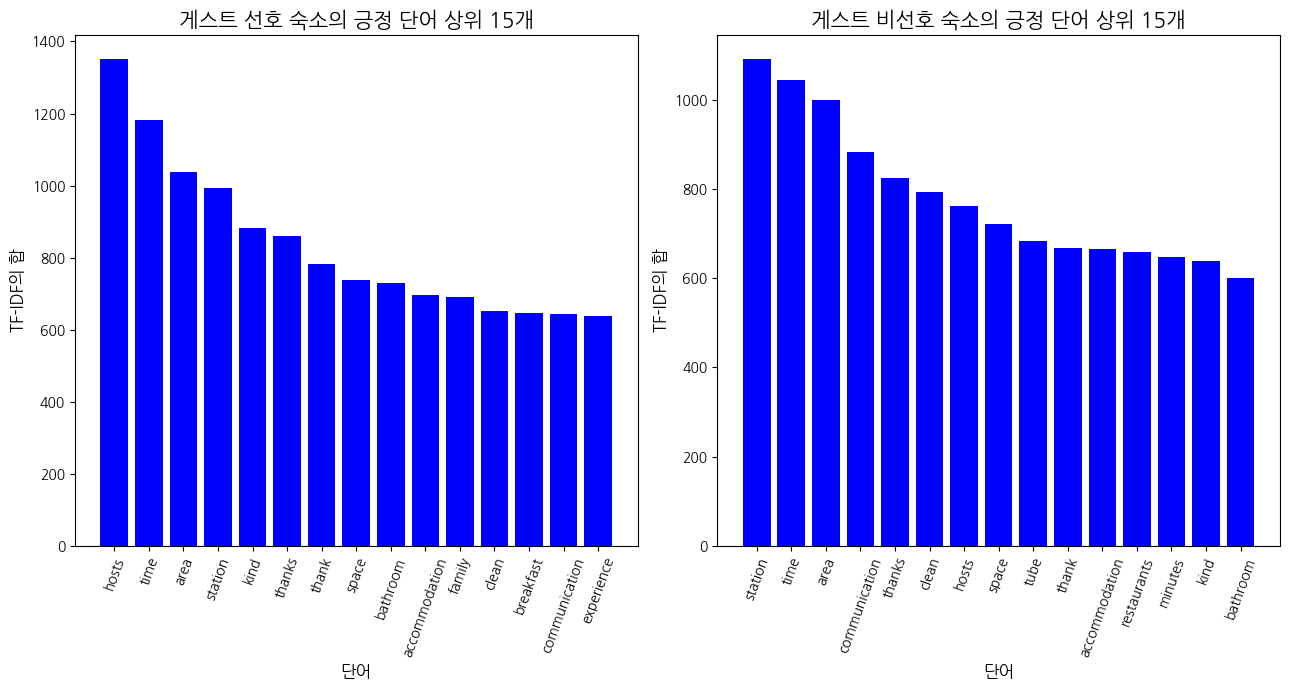

In [109]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from collections import Counter


max_words = 15  # 상위 단어 개수 설정

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))

# 긍정 리뷰 상위 단어 막대 그래프
axes[0].bar(range(max_words), [i[1] for i in pos_words_t[:max_words]], color="blue")
axes[0].set_title("게스트 선호 숙소의 긍정 단어 상위 %d개" % max_words, fontsize=15)
axes[0].set_xlabel("단어", fontsize=12)
axes[0].set_ylabel("TF-IDF의 합", fontsize=12)
axes[0].set_xticks(range(max_words))
axes[0].set_xticklabels([i[0] for i in pos_words_t[:max_words]], rotation=70)

# 부정 리뷰 상위 단어 막대 그래프
axes[1].bar(range(max_words), [i[1] for i in pos_words_f[:max_words]], color="blue")
axes[1].set_title("게스트 비선호 숙소의 긍정 단어 상위 %d개" % max_words, fontsize=15)
axes[1].set_xlabel("단어", fontsize=12)
axes[1].set_ylabel("TF-IDF의 합", fontsize=12)
axes[1].set_xticks(range(max_words))
axes[1].set_xticklabels([i[0] for i in pos_words_f[:max_words]], rotation=70)

# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



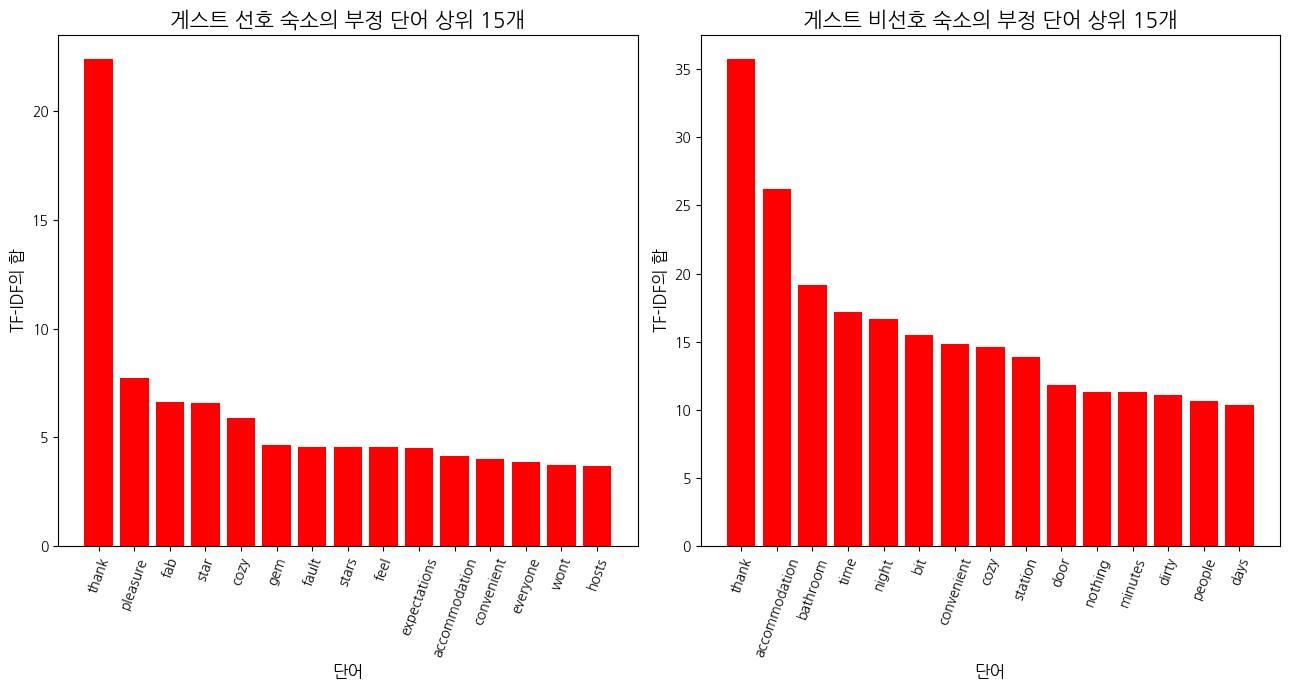

In [110]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from collections import Counter


max_words = 15  # 상위 단어 개수 설정

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))

# 긍정 리뷰 상위 단어 막대 그래프
axes[0].bar(range(max_words), [i[1] for i in neg_words_t[:max_words]], color="red")
axes[0].set_title("게스트 선호 숙소의 부정 단어 상위 %d개" % max_words, fontsize=15)
axes[0].set_xlabel("단어", fontsize=12)
axes[0].set_ylabel("TF-IDF의 합", fontsize=12)
axes[0].set_xticks(range(max_words))
axes[0].set_xticklabels([i[0] for i in neg_words_t[:max_words]], rotation=70)

# 부정 리뷰 상위 단어 막대 그래프
axes[1].bar(range(max_words), [i[1] for i in neg_words_f[:max_words]], color="red")
axes[1].set_title("게스트 비선호 숙소의 부정 단어 상위 %d개" % max_words, fontsize=15)
axes[1].set_xlabel("단어", fontsize=12)
axes[1].set_ylabel("TF-IDF의 합", fontsize=12)
axes[1].set_xticks(range(max_words))
axes[1].set_xticklabels([i[0] for i in neg_words_f[:max_words]], rotation=70)

# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

토픽 모델링

- distribution 값은 이 리뷰가 각 토픽에 속할 확률

In [111]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# NLTK 데이터 다운로드
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# 불용어 설정
stop_words = set(stopwords.words('english'))

# 추가 불용어 목록
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room', 'u']

# 전체 불용어 집합
custom_stopwords = stop_words.union(set(add_stopwords))

# 리뷰 전처리 함수
def preprocess_review(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r'[\r\n]', ' ', text)  # \r과 \n을 공백으로 변환
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # 특수문자 제거
    words = word_tokenize(text)  # 단어 토큰화
    words = [word for word in words if word not in custom_stopwords]  # 불용어 제거
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos in ('NN', 'NNS')]  # 명사 추출
    return ' '.join(nouns)



# 리뷰 전처리 수행
cleaned_reviews_t = [preprocess_review(review) for review in random_guest_t['리뷰']]
cleaned_reviews_f = [preprocess_review(review) for review in random_guest_f['리뷰']]

# TF-IDF 벡터화
tfidf_vectorizer_t = TfidfVectorizer()
tfidf_vectorizer_f = TfidfVectorizer()

tfidf_t = tfidf_vectorizer_t.fit_transform(cleaned_reviews_t)
tfidf_f = tfidf_vectorizer_f.fit_transform(cleaned_reviews_f)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
# LDA 모델 생성 및 학습
from sklearn.decomposition import LatentDirichletAllocation


lda_model_t = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_model_t.fit(tfidf_t)

lda_model_f = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_model_f.fit(tfidf_f)

# 리뷰별 토픽 분포 예측
topic_distribution_t = lda_model_t.transform(tfidf_t)
topic_distribution_f = lda_model_f.transform(tfidf_f)

# 각 리뷰의 토픽 분포 확인
for i, review in enumerate(random_guest_t['리뷰'][:10]):  # 첫 10개의 리뷰만 출력
    print(f"토픽 {i+1}:")
    print(review)
    print(f"토픽 기여도: {topic_distribution_t[i]}")
    print()
print("*" * 50)

for i, review in enumerate(random_guest_f['리뷰'][:10]):  # 첫 10개의 리뷰만 출력
    print(f"토픽 {i+1}:")
    print(review)
    print(f"토픽 기여도: {topic_distribution_f[i]}")
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



토픽 1:
zaklina is a very charming landlady she is nice and warm i am very grateful for all her help the room was neat and clean and the location is also good close to supermarkets and parks it was a wonderful experience
토픽 기여도: [0.73801296 0.0688829  0.06439894 0.06435563 0.06434957]

토픽 2:
impeccable warm and frenchspeaking welcome from the host very quiet house well ventilated and bright in an area accessible by a metro which directly serves the center of london some local shops very practical we highly recommend
토픽 기여도: [0.58170059 0.20306213 0.07173589 0.07176056 0.07174083]

토픽 3:
i enjoyed staying at belindas the house was in a quiet area belinda was available for questions and provided all the informations i needed would definitely stay here again
토픽 기여도: [0.74394602 0.06441726 0.06386714 0.06390134 0.06386823]

토픽 4:
really comfortable sofas beds and garden furniture with crisp linen and soft towelsfabulous kitchen and dining arealots of extra special touches great communication

게스트 선호별 토픽 5개

- 게스트 선호인 숙소의 토픽 단어

In [117]:
# 각 토픽에 해당하는 단어 추출
def get_top_words(model, feature_names, n_top_words):
    top_words_dict_t = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_t = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_dict_t[f"Topic {topic_idx}"] = top_words_t
    return top_words_dict_t

n_top_words = 15
feature_names = tfidf_vectorizer_t.get_feature_names_out()
top_words_t = get_top_words(lda_model_t, feature_names, n_top_words)

# 각 토픽의 상위 단어 출력
for topic, words in top_words_t.items():
    print(f"{topic}: {', '.join(words)}")

Topic 0: hosts, clean, thank, thanks, kind, accommodation, time, experience, family, hospitality, welcome, studio, people, cozy, feel
Topic 1: station, area, restaurants, time, space, tube, bathroom, minutes, city, walk, hosts, bus, access, breakfast, kind
Topic 2: claire, quiet, cottage, claires, air, stays, bnb, communicative, sandra, pub, superb, stylish, square, youll, class
Topic 3: time, pleasant, hostess, convenient, brixton, visit, alice, ill, communicate, opportunity, accomodation, hope, come, shoreditch, view
Topic 4: communication, christine, brilliant, hesitation, tidy, price, right, ease, barbara, stadium, review, alices, wembley, jack, christines


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



번역 <br>
- 주제 0: 호스트, 깨끗함, 감사합니다, 감사합니다, 친절함, 숙소, 시간, 경험, 가족, 환대, 환영, 스튜디오, 사람들, 아늑함, 느낌
- 주제 1: 역, 지역, 레스토랑, 시간, 공간, 지하철, 화장실, 분, 도시, 도보, 호스트, 버스, 접근성, 아침 식사, 종류
- 주제 2: 클레어(빛나는,밝은), 조용함, 코티지(시골집), 클레어스(옷 브랜드), 에어, 스테이, 비앤비, 의사소통 가능, 산드라(옷브랜드), 펍, 최고, 스타일리쉬, 광장, Youll(you'll), 클래스
- 주제 3: 시간, 쾌적, 여주인, 편리함, 브릭스톤(런던지역), 방문, 앨리스(이름,고귀한), ill(슬랭느낌, 잘나가는, 아픈), 의사소통, 기회, 숙박, 희망, 오다, 쇼어디치(지역이름), 전망
- 주제 4: 커뮤니케이션, 크리스틴(이름), 훌륭한, 주저하다, 깔끔함, 가격, 오른쪽, 용이함, barbara(이방인), 스타디움, 리뷰, alices(고귀한), 웸블리(지역), 잭(남성이름,기계를 들어올리는 도구), 크리스틴스


토픽의 주제 정하기 ( 저의 생각입니다) <br>

- topic 0 : 호스트와 환대
- topic 1 : 숙소 위치와 접근성
- topic 2 : 주변 쇼핑몰 접근성
- topic 3 : 편리한 숙박 경험
- topic 4 : 가격과 리뷰

- 게스트 선호가 아닌 숙소의 토픽 단어

In [119]:
# 각 토픽에 해당하는 단어 추출
def get_top_words(model, feature_names, n_top_words):
    top_words_dict_f = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_f = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_dict_f[f"Topic {topic_idx}"] = top_words_f
    return top_words_dict_f

n_top_words = 10
feature_names = tfidf_vectorizer_f.get_feature_names_out()
top_words_f = get_top_words(lda_model_f, feature_names, n_top_words)

# 각 토픽의 상위 단어 출력
for topic, words in top_words_f.items():
    print(f"{topic}: {', '.join(words)}")

Topic 0: bathroom, night, kitchen, bit, time, water, shower, bedroom, bed, space
Topic 1: station, area, clean, time, hosts, tube, restaurants, minutes, city, convenient
Topic 2: responsive, welcome, kids, check, weekend, deal, feel, service, transit, cats
Topic 3: thank, thanks, hospitality, experience, pleasant, beautiful, welcoming, visit, future, communication
Topic 4: value, money, communication, accommodation, price, people, kind, bed, person, comfy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- 주제 0: 욕실, 밤, 부엌, 비트, 시간, 물, 샤워기, 침실, 침대, 공간
- 주제 1: 역, 지역, 깨끗함, 시간, 호스트, 지하철, 레스토랑, 분, 도시, 편리함
- 주제 2: 반응형, 환영, 어린이, 확인, 주말, 거래, 느낌, 서비스, 대중교통, 고양이
- 주제 3: 감사합니다, 감사합니다, 환대, 경험, 즐겁고, 아름답습니다, 환영합니다, 방문, 미래, 소통
- 주제 4: 가치, 돈, 소통, 숙소, 가격, 사람, 친절, 침대, 사람, 편안함

- topic 0 : 숙소 시설과 공간
- topic 1 : 위치와 편리성
- topic 2 : 서비스와 환영
- topic 3 : 호스트와의 소통
- topic 4 : 숙소의 가치와 친절함

<예시> <br>

Review 1:
We had a great trip, the airbnb is great and very well located <br>
Topic Distribution: <br>
[0.0668716   0.06687163  0.06861975
 0.06687151  0.73076551] <br>

<br>

- 각 확률이 5개가 있다. (토픽이 5개가 나왔다는 의미)
- 각 수치가 높을수록 해당 토픽에 속할 확률이 높다는 것

- 5개중 가장 높은 수치가 0.7307 >> 토픽 5번에 속할 확률이 높다는 뜻

find_all

게스트 선호숙소별 긍정/부정 별 토픽 모델링 시각화

html 주소로 저장

In [136]:
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel

def preprocess_review(text_nouns, output_html):
    # 단어 사전 및 코퍼스 생성
    dictionary = corpora.Dictionary(text_nouns)
    corpus = [dictionary.doc2bow(text) for text in text_nouns]

    # LDA 모델 학습
    num_topics = 5  # 토픽 수 설정
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # PyLDAvis 시각화
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

    # HTML 파일로 저장
    pyLDAvis.save_html(vis, output_html)
    print(f"LDA visualization saved to {output_html}")

# HTML 파일로 저장
preprocess_review(pos_nouns_t, 'pos_nouns_t_lda_vis.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LDA visualization saved to pos_nouns_t_lda_vis.html


In [126]:
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel

def preprocess_review(text_nouns):
    # 단어 사전 및 코퍼스 생성
    dictionary = corpora.Dictionary(text_nouns)
    corpus = [dictionary.doc2bow(text) for text in text_nouns]

    # LDA 모델 학습
    num_topics = 5  # 토픽 수 설정
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # 각 토픽 출력
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic: {idx} \n Words: {topic}")

    # PyLDAvis 시각화
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [123]:
preprocess_review(neg_nouns_t) # 게스트선호 숙소의 부정인 단어

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
 Words: 0.037*"star" + 0.034*"cozy" + 0.023*"feel" + 0.019*"nothing" + 0.018*"hosts" + 0.015*"stars" + 0.015*"shes" + 0.012*"b" + 0.012*"described" + 0.012*"experience"
Topic: 1 
 Words: 0.041*"pleasure" + 0.026*"fault" + 0.023*"expectations" + 0.019*"cant" + 0.012*"days" + 0.012*"feels" + 0.012*"favourite" + 0.008*"everyone" + 0.008*"bathroom" + 0.008*"night"
Topic: 2 
 Words: 0.025*"fab" + 0.018*"wonderfull" + 0.018*"wont" + 0.011*"noise" + 0.011*"space" + 0.011*"perfection" + 0.011*"times" + 0.008*"james" + 0.008*"area" + 0.008*"center"
Topic: 3 
 Words: 0.024*"gem" + 0.019*"accommodation" + 0.019*"time" + 0.015*"use" + 0.015*"ill" + 0.015*"x" + 0.014*"visit" + 0.010*"et" + 0.010*"philip" + 0.010*"trs"
Topic: 4 
 Words: 0.136*"thank" + 0.024*"convenient" + 0.012*"everyone" + 0.009*"didnt" + 0.009*"hope" + 0.009*"rest" + 0.009*"condition" + 0.009*"grate" + 0.009*"lets" + 0.009*"marilyn"


In [124]:
preprocess_review(neg_nouns_f) # 게스트선호가 아닌 숙소의 긍정인 단어

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
 Words: 0.017*"time" + 0.014*"people" + 0.014*"experience" + 0.010*"day" + 0.008*"space" + 0.007*"rooms" + 0.006*"days" + 0.006*"stars" + 0.006*"didnt" + 0.005*"wouldnt"
Topic: 1 
 Words: 0.020*"station" + 0.010*"minutes" + 0.009*"didnt" + 0.009*"accommodation" + 0.008*"property" + 0.007*"area" + 0.007*"night" + 0.006*"restaurants" + 0.006*"space" + 0.006*"water"
Topic: 2 
 Words: 0.030*"accommodation" + 0.017*"door" + 0.015*"bathroom" + 0.012*"convenient" + 0.012*"time" + 0.009*"description" + 0.007*"floor" + 0.007*"minutes" + 0.007*"way" + 0.007*"studio"
Topic: 3 
 Words: 0.025*"bathroom" + 0.016*"night" + 0.014*"dirty" + 0.012*"floor" + 0.011*"water" + 0.011*"shower" + 0.011*"toilet" + 0.010*"kitchen" + 0.010*"day" + 0.009*"bed"
Topic: 4 
 Words: 0.033*"thank" + 0.011*"people" + 0.011*"dont" + 0.011*"communication" + 0.010*"night" + 0.009*"value" + 0.009*"nothing" + 0.008*"money" + 0.007*"bed" + 0.007*"photos"


In [125]:
preprocess_review(neg_nouns_f) # 게스트선호가 아닌 숙소의 부정인 단어

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
 Words: 0.013*"experience" + 0.011*"bathroom" + 0.008*"door" + 0.008*"bed" + 0.007*"time" + 0.007*"person" + 0.007*"night" + 0.007*"wouldnt" + 0.007*"communication" + 0.006*"window"
Topic: 1 
 Words: 0.013*"cozy" + 0.013*"bathroom" + 0.012*"photos" + 0.012*"door" + 0.009*"convenient" + 0.009*"value" + 0.009*"kitchen" + 0.008*"didnt" + 0.008*"time" + 0.008*"bed"
Topic: 2 
 Words: 0.019*"accommodation" + 0.015*"time" + 0.013*"night" + 0.012*"bathroom" + 0.011*"dirty" + 0.010*"didnt" + 0.009*"water" + 0.008*"nothing" + 0.008*"floor" + 0.007*"trip"
Topic: 3 
 Words: 0.016*"bathroom" + 0.015*"night" + 0.013*"water" + 0.012*"people" + 0.010*"accommodation" + 0.010*"dirty" + 0.010*"shower" + 0.009*"day" + 0.009*"door" + 0.009*"time"
Topic: 4 
 Words: 0.031*"thank" + 0.019*"bit" + 0.017*"station" + 0.011*"days" + 0.010*"space" + 0.008*"day" + 0.008*"time" + 0.008*"bedroom" + 0.007*"minutes" + 0.007*"dont"
